# How to Minimise Churn While Increasing Revenue on your Customer Base

<a id='0'></a>
# Content

* [Content](#0)
* [1. Introduction](#1)
    * [1.1 Causes of customer churn](#1.1)
    * [1.2 Types of customer churn](#1.2)
* [2. Loading Libraries and Dataset](#2)
    * [2.1 Load Libraries](#2.1)    
    * [2.2 Load Dataset](#2.2)
* [3. Data cleaning and engineering](#3)
* [4. Exploratory Data Analysis](#4)
    * [4.1 Analysing our target variable](#4.1)    
    * [4.2 Analysis customer's features variable](#4.2)
        * [4.2.1 Analysis Gender x Churn](#4.2.1)
        * [4.2.2 Analysis Senior Citizen x Churn](#4.2.2)
        * [4.2.3 Analysis Partner x Churn](#4.2.3)
        * [4.2.4 Analysis Dependents x Churn](#4.2.4)
    * [4.3 Analysis Product Features vs Churn](#4.3)
        * [4.3.1 Analysis Phone Service and MultipleLines vs Churn](#4.3.1)
        * [4.3.2 Analysis Internet Service vs Churn](#4.3.2)
        * [4.3.3 Analysis Online Security vs Churn](#4.3.3)
        * [4.3.4 Analysis Online Backup vs Churn](#4.3.4)
        * [4.3.5 Analysis Device Protection vs Churn](#4.3.5)
        * [4.3.6 Analysis Tech Support vs Churn](#4.3.6)  
        * [4.3.7 Analysis Streaming TV and Streaming Movie vs Churn](#4.3.7) 
    * [4.4 Analysis Contract Features vs Churn](#4.4)
        * [4.4.1 Analysis Contract and Tenure vs Churn](#4.4.1)
        * [4.4.2 Analysis Paperless Billing and Payment Method vs Churn](#4.4.2)
        * [4.4.3 Analysis Monthly Charges vs Churn](#4.4.3)
        * [4.4.4 Analysis Discounts or Extra vs Churn](#4.4.4)
    * [4.5 Resuming our EDA](#4.5)
    * [4.6 Correlation Matrix](#4.6)
    * [4.7 Observations](#4.7)
* [5. Modelling](#5)
    * [5.1 Methodology performed in the first part of the project](#5.1)
        * [5.1.1 Applying the models with 10% test and 90% training](#5.1.1)
        * [5.1.2 Applying the models with 20% test and 80% training](#5.1.2)
        * [5.1.3 Applying the models with 30% test and 70% training](#5.1.3)
        * [5.1.4 Applying the Logistic Regression model with 20% testing and 80% training using the SMOTE technique](#5.1.4)
        * [5.1.5 Applying the Logistic Regression model with 20% testing and 80% training using the NearMiss technique](#5.1.5)
        * [5.1.6 Observation](#5.1.6)
        
        
        

* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Evaluate Models](#4.2) 
* [6. Model Tuning](#5)
    * [5.1. Model Tuning-Right Evaluation Metric](#5.1)
    * [5.2. Model Tuning-Balancing the sample](#5.2) 


<a id='1'></a>
# 1. Introduction 


Before analyzing our database, we will briefly introducte what is  churn and its importance.

Churn is a common problem in the telecommunications business and refers to customers who cancel or do not renew their contract with a telecommunications company in a given period. Churn is a very important indicator for telecommunications companies since it is much more expensive to attract new customers than to retain existing ones. 

What we aim with our analysis is identifying according to our dataset the main factoso the analysis of company data can help predict and prevent churn.

<a id='1.1'></a>
## 1.1 Causes of Customer Churn

1.-Price: If customers find a more cost-effective solution to themselves, they may churn. It is essential to present the added value, so customers feel that the purchase is worth the cost.

2.-Product/Market Fit: When the client feel that they cannot achieve their goals with our solution.

3.-User Experience: If the user experience with the product or application is buggy, and glitchy, for them, they will be less likely to use it on a regular basis and build expertise with it.

4.-Customer experience: If a customer's experience connecting with other aspects of the company, such as customer service, executives, technical support, and installation service, is not positive, the likelihood of churn could increase.

5.-Other causes: It is also considered churn when a customer moves to another adress in which the company cannot service it, when customer deceases, when the demand for the service no longer exist.

<a id='1.2'></a>
## 1.2 Types of Customer Churn


Revenue Churn: This happens when customers downgrade to a cheaper version of our product. 

1.-Competitor Intervention: It is very important to focus on the reason why customers leave the company for our competitors. Are we a bad option for your business? Or is it something we are doing that is driving them away?

2.-Unsuccessful Onboarding: This happens when executives focus only on the sale and not on the right solution for the client as a technology partner.

3.-Desired Feature or Functionality: This happens when we offer all customers the same product, and we do not understand that the product must be adapted to the customer and not the customer to the product.

4.-Company Closure: In these cases, there is not much we can do. But it is essential to have these cases very well-identified in advance and inform our manager.


In this project we will analyze the data we have about Churn, we will study its possible causes and will provide some solutions to reduce Churn and increasing revenue.

* [Content](#0)

<a id='2'></a>
# 2. Loading Libraries and Dataset

<a id='2.1'></a>
## 2.1 Loading libraries

In [410]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#Models for Modeling Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

<a id='2.2'></a>
## 2.2 Loading Dataset

In [411]:
# Importing the dataset.

df_churn = pd.read_csv('Telco_Churn.csv')

The first step was reading the dataset using the function read_csv. As it follows we will print the first 5 rows of the dataset to have a quick look, and also get the most basic information about the dataset using the function info().

In [412]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [413]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can verify that the dataset has 7043 rows and 21 features, divided among categorical and numerical variables. Most of the variables are classified as objects but we also have integers and continuous variables. Initially we cannot identify any variable with null values. 

Something that caughts our intention in this initial glance on the dataset is that the 19th feature, TotalCharges, is classified as object, although we can verify numerical values on the five first rows above. Therefore this variable will require some kind of preparation before any analysis.

* [Content](#0)

<a id='3'></a>
# 3. Data Cleaning and Engineering

Let us first verify if any of the features contain null values that have not been shown in the function info(). 

In [414]:
#Calculating the number of null values in each feature of our dataset.

df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can verify, none of the columns have null values, and therefore we will try to catch any undesired on unformated data among the numbers, and verify why the total TotalCharges is read as a objectic.

The following syntax works to replace all values in our "df_churn" Data Frame that are in the list ["n.a.","?","NA","n/a", "na", "--" , " " ] to np.nan, which is the value typically used to represent a missing value in Python.

This is useful in data preprocessing as it is common for data to have missing values or missing data that is represented in different ways. By replacing them with a single value (np.nan), methods can be applied to handle these missing values uniformly.

To understand what to replace in this case, considering that there are only 11 values missing. The dataframe will be filtered to verify other values of these same rows.

In [415]:
#Applying the list suggested to replace some common mistaken data on the dataset by NaN, so
#that they may be undercovered.

df_churn.replace(["n.a.","?","NA","n/a", "na", "--", " "], np.nan, inplace = True)

In [416]:
#Filtering the null values on the feature TotalCharges
df_churn[df_churn['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It is possible to identify that all the rows missing values for TotalCharges have tenure equals to 0. Tenure equals to 0 means that this customer has onboarded under a month ago, and there it has not paid any monthly charge yet. Therefore, we identify that missing values on TotalCharges are mistypings that should have been filled with 0. Thus, they will be replace by 0. After executing this procedure, the column will be converted to a numeric column.

In [417]:
#Replacing null values on TotalCharges columns by 0.

df_churn['TotalCharges'].fillna('0', inplace = True)

In [418]:
#Converting the column TotalCharges to numeric.

df_churn['TotalCharges']=pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [419]:
#Verifying information about the dataset again.

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now we can call a descriptive analysis of our dataset to verify some main features of the numerical variables.

In [420]:
#Calling the descriptive analysis of the dataset

df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This function returns a summary of the statistics of numeric columns on the dataset.

The summary includes the number of non-null values, the mean, the standard deviation, the minimum and maximum values, and the 25%, 50%, and 75% percentiles.

The descriptive analysis shows us something we have not noticed before, although the feature SeniorCitizen is read as an integer, it is actually a binary variable that represents categories, and it will need to be converted to such. 

We can verify from our descriptive analysis:

1- Contracts of the company are as long as 32 months in average. Half of the contracts concentrate up to 29 months, and the longer contract has 72 months.

2- The smallest month charge in our dataset is 18.25 and the highest 118.75. The average monthly charge of the company is 64.76.

3- Our maximum values in TotalCharges is 8684.8, however 75% of the total amounts concentrate until 3786.60 and 50% concentrate until 1394.55. This difference is a way higher than what we can observe in tenure and Monthly Charges. Considering that TotalCharges should be approximately the product of tenure by Monthly Charges, that might mean that customers either have high priced contracts, or stay long time as customers, but both is unlikely. 

4- The fact that TotalCharges are not exactly the product of tenure and monthly charges, gives us the hint that the dataset can be engineered to get a feature that describes whether a customer has been given discounts or charged extra for any reason, and we believe that this might influence its likelyhood to churn. Therefore this feature will be added and tested.

In [421]:
#Engineering a feature to verify whether customers had discounts or paid extras
df_churn['DiscountsorExtra'] = (df_churn['tenure']*df_churn['MonthlyCharges'])-df_churn['TotalCharges']

In [422]:
#Describing the feature just created
df_churn['DiscountsorExtra'].describe()

count    7043.000000
mean       -0.152953
std        67.202778
min      -373.250000
25%       -28.500000
50%         0.000000
75%        28.600000
max       370.850000
Name: DiscountsorExtra, dtype: float64

In [423]:
df_churn.customerID.is_unique

True

After the process that has been performed, we could verify that the featur customerID has only is a categorical column that has only unique values, and they represent an identificaiton of the customer, therefore it does not help us with any prediction power, and it will be dropped.

In [424]:
df_churn.drop(columns = 'customerID', inplace=True)

Once our dataset is clean and prepared, we can follow to our exploratory data analysis.

* [Content](#0)

<a id='4'></a>
# 4- EXPLORATORY DATA ANALYSIS

We will explore our data feature by feature, to verify what can we find out about our dataset, and how variables may influence our variable churn. 

<a id='4.1'></a>
## 4.1- Analysing our target variable

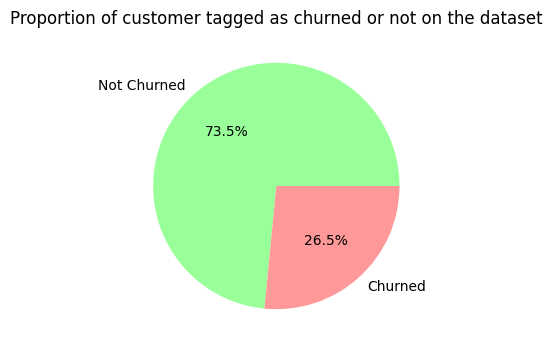

In [425]:
#Plotting a pie plot to verify proportion of customer that has and has not churned on the dataset
proportion_churn = pd.crosstab(df_churn['Churn'], columns = 'count').reset_index()
plt.subplots(figsize=(4, 4))
plt.pie(data = proportion_churn, labels = ['Not Churned', 'Churned'], x='count', autopct="%.1f%%",
       colors= ['#99ff99','#ff9999']);
plt.title ('Proportion of customer tagged as churned or not on the dataset');

As it is possible to see, our dataset is unbalanced. We have much more negative categories, customer that has not churned, that positive categories, customers that has churned. All the features that will be analysed onwards, must be analysed by comparison between percentages in category churn and not churned. That is because even if a feature has high percentage within customers that have churned, it might have a even higher category among customers that have not churned. So to reach proper conclusions, comparisons are necessary.

<a id='4.2'></a>
## 4.2- Analysis Customer's Features vs Churn

<a id='4.2.1'></a>
### 4.2.1- Analysis Gender vs Churn

In [315]:
#Grouping our dataset by gender and whether or not a customer has churned.
genderxchurn = df_churn.groupby(['gender', 'Churn']).size().unstack(fill_value=0).reset_index()
genderxchurn

Churn,gender,No,Yes
0,Female,2549,939
1,Male,2625,930


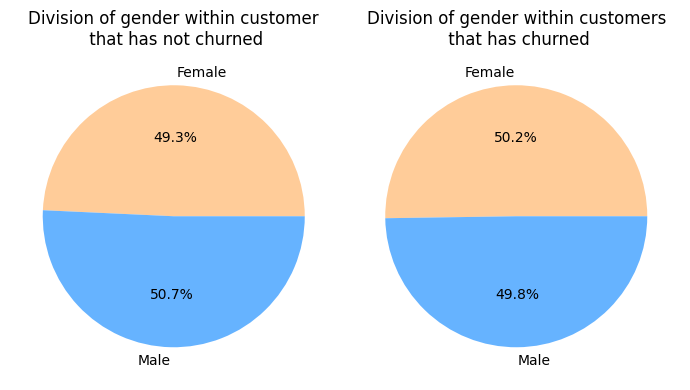

In [280]:
#Plot pie chart to visualize proportion of gender for both customers that have and have not churned.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[7, 7])
ax[0].pie(data = genderxchurn, labels = ['Female', 'Male'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[0].set_title('Division of gender within customer\n that has not churned')
ax[1].pie(data = genderxchurn, labels = ['Female', 'Male'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[1].set_title('Division of gender within customers\n that has churned')
plt.tight_layout();

As we can verify, the proportion of male and female customers among customers that have and have not churned is very similar. Thus we understand this variable does not influence on churning rates.

<a id='4.2.2'></a>
### 4.2.2- Analysis Senior Citizens vs Churn

In [281]:
#Grouping our dataset by Senior Citizens and whether or not a customer has churned.

seniorcitizensxchurn = df_churn.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0).reset_index()
seniorcitizensxchurn

Churn,SeniorCitizen,No,Yes
0,0,4508,1393
1,1,666,476


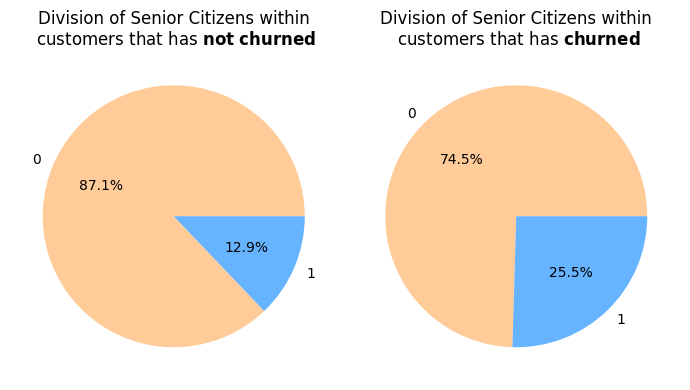

In [282]:
#Plot pie chart to visualize proportion of Senior Citizens for both customers that have and have not churned.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[7, 7])
ax[0].pie(data = seniorcitizensxchurn, labels = ['0', '1'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[0].set_title('Division of Senior Citizens within\n customers that has ' + r'$\bf{not\ churned}$')
ax[1].pie(data = seniorcitizensxchurn, labels = ['0', '1'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[1].set_title('Division of Senior Citizens within\n customers that has ' + r'$\bf{churned}$')
plt.tight_layout();

It is possible to verify that the percentage of Senior Citizens among customers that have churned is higher than those that have not churned, therefore, we expect this variable to have some influence over churn.

<a id='4.2.3'></a>
### 4.2.3- Analysis Partner vs Churn

In [96]:
#Grouping our dataset by Parner and whether or not a customer has churned.

partnerxchurn = df_churn.groupby(['Partner', 'Churn']).size().unstack(fill_value=0).reset_index()
partnerxchurn

Churn,Partner,No,Yes
0,No,2441,1200
1,Yes,2733,669


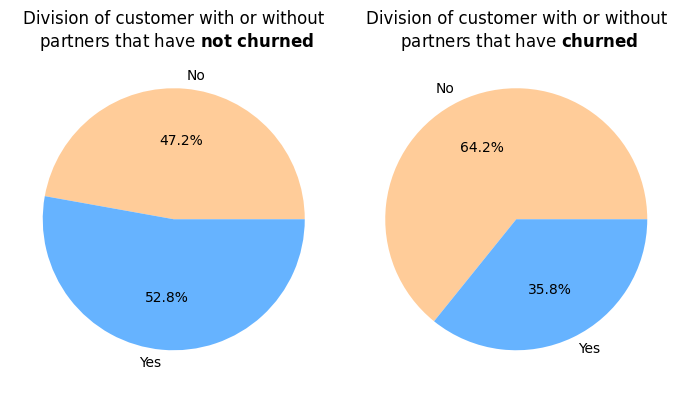

In [97]:
#Plot pie chart to visualize proportion of customers with Partners for both customers that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[7, 7])
ax[0].pie(data = partnerxchurn, labels = ['No', 'Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[0].set_title('Division of customer with or without\n partners that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = partnerxchurn, labels = ['No', 'Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[1].set_title('Division of customer with or without\n partners that have ' + r'$\bf{churned}$')
plt.tight_layout();

It is possible to verify that a higher percentage of people who do not partner have churned compared to those that have a partner. It means that the feature partner might contribute negativaly for churn.

<a id='4.2.4'></a>
### 4.2.4- Analysis Dependents vs Churn

In [101]:
#Grouping our dataset by Parner and whether or not a customer has churned.

dependentsxchurn = df_churn.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0).reset_index()
dependentsxchurn

Churn,Dependents,No,Yes
0,No,3390,1543
1,Yes,1784,326


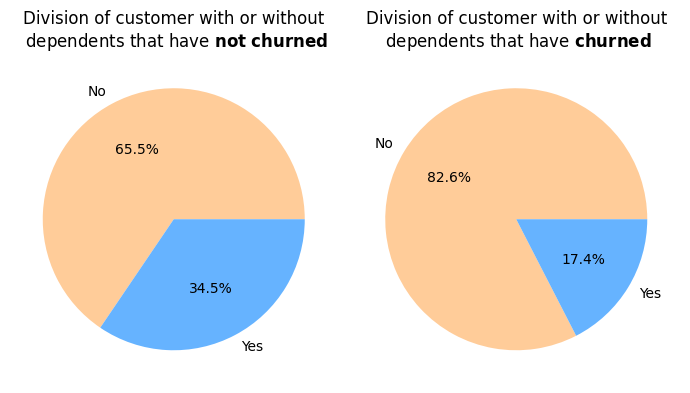

In [102]:
#Plot pie chart to visualize proportion of customers with or without dependents that have and have not churned.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[7, 7])
ax[0].pie(data = dependentsxchurn, labels = ['No', 'Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[0].set_title('Division of customer with or without\n dependents that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = dependentsxchurn, labels = ['No', 'Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[1].set_title('Division of customer with or without\n dependents that have ' + r'$\bf{churned}$')
plt.tight_layout();

In [98]:
#Grouping our dataset by Dependents and whether or not a customer has churned.
dependentsxchurn = df_churn.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0).reset_index()
dependentsxchurn

Churn,Dependents,No,Yes
0,No,3390,1543
1,Yes,1784,326


Again, as it happened with partnets, we can verify that the percentage of customers without dependents is higher among those who have churned than those who have not churned, that means that having a dependent migth reduce the chances of a customers to leave the company.

It is important to understand, that as those features are related to customer's features, they are directly connected with the marketing strategy for specific targets, rather than thinking that some target should be favorited by the company. We have seen that young people, without a partner and without dependents are more likely to churn, therefore, the company must keep a closer contact with this target, offering new products, attempting renewing contracts, colecting feedbacks, and so on. 

* [Content](#0)

<a id='4.3'></a>
## 4.3- Analysis Product Features vs Churn

<a id='4.3.1'></a>
### 4.3.1- Analysis Phone Service and MultipleLines vs Churn

In [107]:
#Grouping our dataset by Phone Service and whether or not a customer has churned.

phoneservicexchurn = df_churn.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0).reset_index()

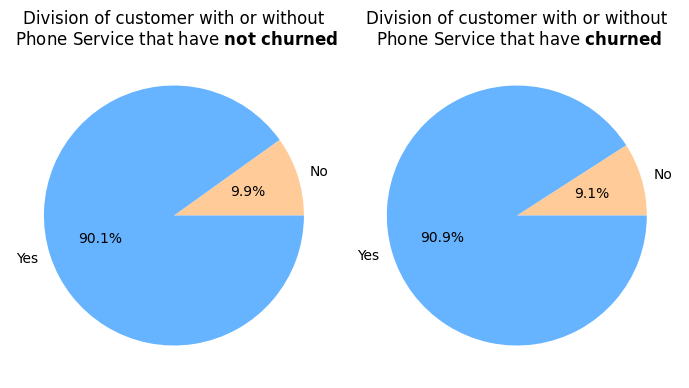

In [104]:
#Plot pie chart to visualize proportion of customers with or without phone service that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[7, 7])
ax[0].pie(data = phoneservicexchurn, labels = ['No', 'Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[0].set_title('Division of customer with or without\n Phone Service that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = phoneservicexchurn, labels = ['No', 'Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff']);
ax[1].set_title('Division of customer with or without\n Phone Service that have ' + r'$\bf{churned}$')
plt.tight_layout();

We can verify that whether a customer has phone service or not does not strongly influence churn, because the percentages in both groups that have and have not churned is very similar.

In [105]:
#Grouping our dataset by Multiple Lines and whether or not a customer has churned.

multiplelinesxchurn = df_churn.groupby(['MultipleLines', 'Churn']).size().unstack(fill_value=0).reset_index()
multiplelinesxchurn

Churn,MultipleLines,No,Yes
0,No,2541,849
1,No phone service,512,170
2,Yes,2121,850


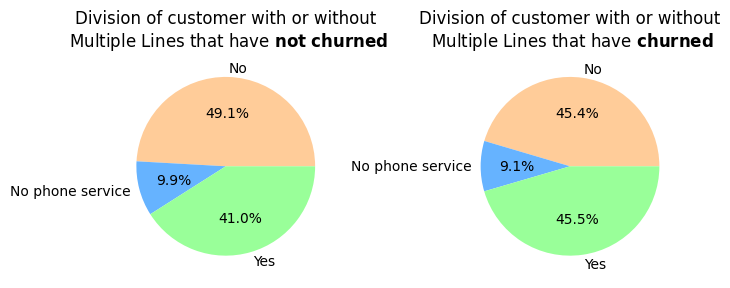

In [106]:
#Plot pie chart to visualize proportion of customers with or without multiple lines that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[7, 7])
ax[0].pie(data = multiplelinesxchurn, labels = ['No', 'No phone service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Multiple Lines that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = multiplelinesxchurn, labels = ['No', 'No phone service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Multiple Lines that have ' + r'$\bf{churned}$')
plt.tight_layout();

Although there is a small difference in the percentages in within the groups that have and have not churn, the difference is small, and the variable probably does not influence churn enough to be considered. An statiscal test will make clear whether or not the variable should be brought to machine learning models.

* [Content](#0)

<a id='4.3.2'></a>
### 4.3.2- Analysis Internet Service vs Churn

In [231]:
#Grouping our dataset by Internet Service and whether or not a customer has churned.

internetservicexchurn = df_churn.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0).reset_index()
internetservicexchurn['Total']=internetservicexchurn['No']+internetservicexchurn['Yes']
internetservicexchurn

Churn,InternetService,No,Yes,Total
0,DSL,1962,459,2421
1,Fiber optic,1799,1297,3096
2,No,1413,113,1526


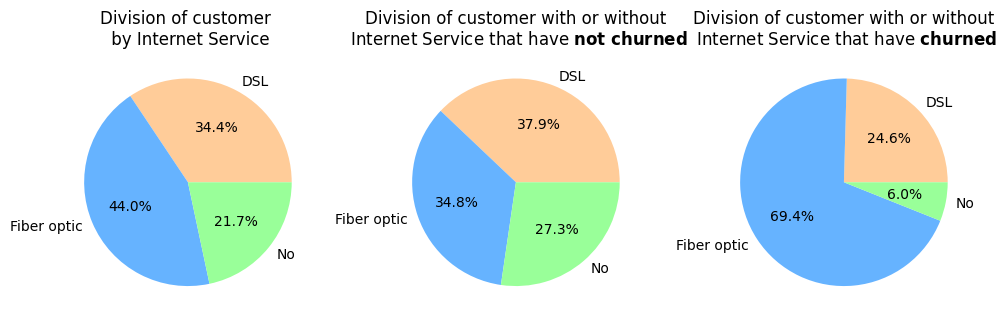

In [235]:
#Plot pie chart to visualize proportion of customers with internet service that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[10, 10])
ax[0].pie(data = internetservicexchurn,labels = ['DSL', 'Fiber optic','No'], x='Total', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer \n by Internet Service')
ax[1].pie(data = internetservicexchurn, labels = ['DSL', 'Fiber optic','No'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Internet Service that have ' + r'$\bf{not\ churned}$')
ax[2].pie(data = internetservicexchurn, labels = ['DSL', 'Fiber optic','No'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[2].set_title('Division of customer with or without\n Internet Service that have ' + r'$\bf{churned}$')
plt.tight_layout();

Reviewing the 'InternetService' column, we can identify that on the group that have churned, Fiber optic represents nearly the double of the percentage of customers that have not churned and have the same service. It is possible to see also that customer that do not have internet are less likely to churn. That means that either exists a problem on internet service of the company, that do not attend the demand properly, or just exposes the volatility and competitiveness of the internet sector, over which customers are more exigent and competitors are more agressive.

* [Content](#0)

<a id='4.3.3'></a>
### 4.3.3- Analysis Online Security vs Churn

In [112]:
#Grouping our dataset by Online Security and whether or not a customer has churned.

onlinesecurityxchurn = df_churn.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0).reset_index()
onlinesecurityxchurn

Churn,OnlineSecurity,No,Yes
0,No,2037,1461
1,No internet service,1413,113
2,Yes,1724,295


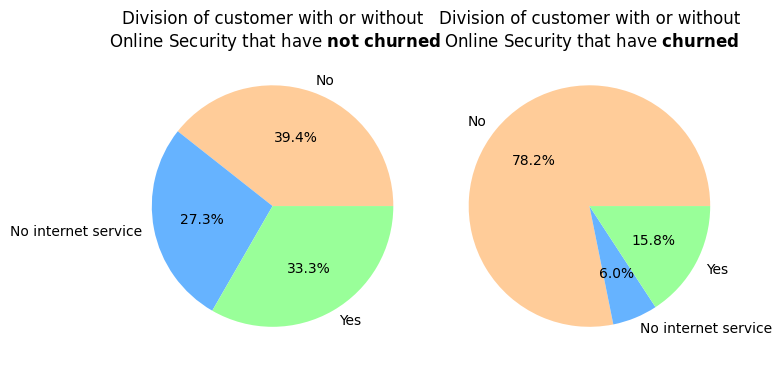

In [115]:
#Plot pie chart to visualize proportion of customers with Online Security that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = onlinesecurityxchurn, labels = ['No', 'No internet service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Online Security that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = onlinesecurityxchurn, labels = ['No', 'No internet service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Online Security that have ' + r'$\bf{churned}$')
plt.tight_layout();

It is possible to identify that a much bigger parcel of customers that have churned do not have online security, compared to those that have not churned.

* [Content](#0)

<a id='4.3.4'></a>
### 4.3.4- Analysis Online Backup vs Churn

In [116]:
#Grouping our dataset by Online Backup and whether or not a customer has churned.

onlinebackupxchurn = df_churn.groupby(['OnlineBackup', 'Churn']).size().unstack(fill_value=0).reset_index()
onlinebackupxchurn

Churn,OnlineBackup,No,Yes
0,No,1855,1233
1,No internet service,1413,113
2,Yes,1906,523


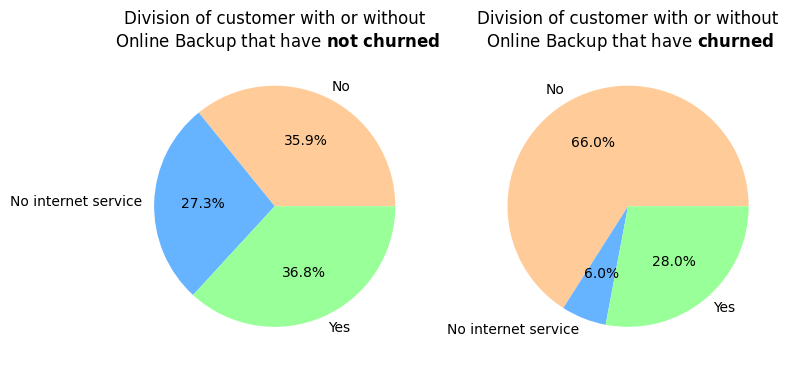

In [120]:
#Plot pie chart to visualize proportion of customers with Online Backup that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = onlinebackupxchurn, labels = ['No', 'No internet service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Online Backup that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = onlinebackupxchurn, labels = ['No', 'No internet service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Online Backup that have ' + r'$\bf{churned}$')
plt.tight_layout();

* [Content](#0)

<a id='4.3.5'></a>
### 4.3.5- Analysis Device Protection vs Churn

In [118]:
#Grouping our dataset by Device Protection and whether or not a customer has churned.

deviceprotectionxchurn = df_churn.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0).reset_index()
deviceprotectionxchurn

Churn,DeviceProtection,No,Yes
0,No,1884,1211
1,No internet service,1413,113
2,Yes,1877,545


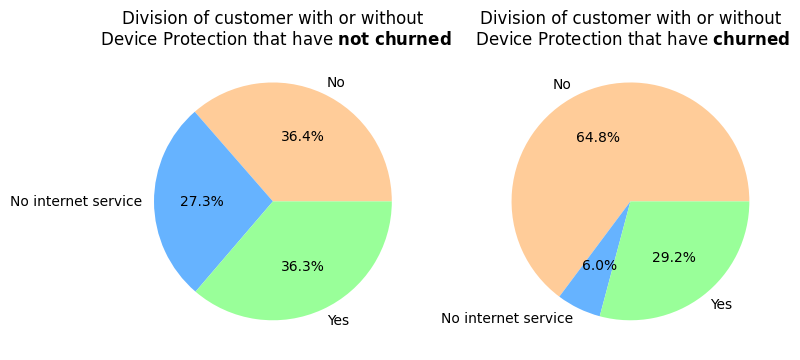

In [121]:
#Plot pie chart to visualize proportion of customers with Device Protection that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = deviceprotectionxchurn, labels = ['No', 'No internet service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Device Protection that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = deviceprotectionxchurn, labels = ['No', 'No internet service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Device Protection that have ' + r'$\bf{churned}$')
plt.tight_layout();

* [Content](#0)

<a id='4.3.6'></a>
### 4.3.6- Analysis Tech Support vs Churn

In [122]:
#Grouping our dataset by Tech Support and whether or not a customer has churned.

techsupportxchurn = df_churn.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0).reset_index()
techsupportxchurn

Churn,TechSupport,No,Yes
0,No,2027,1446
1,No internet service,1413,113
2,Yes,1734,310


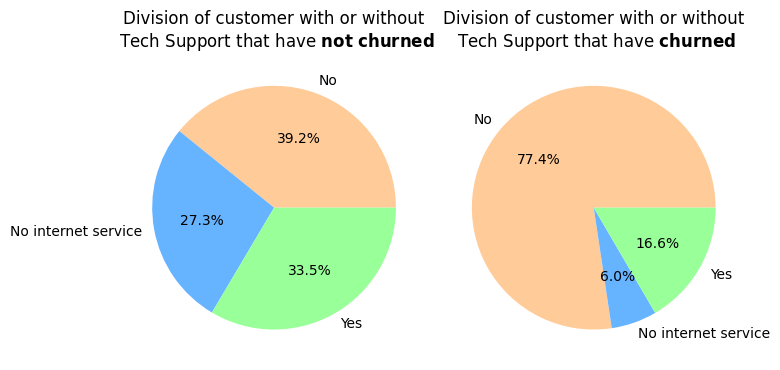

In [123]:
#Plot pie chart to visualize proportion of customers with Tech Support that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = techsupportxchurn, labels = ['No', 'No internet service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Tech Support that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = techsupportxchurn, labels = ['No', 'No internet service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Tech Support that have ' + r'$\bf{churned}$')
plt.tight_layout();

* [Content](#0)

<a id='4.3.7'></a>
### 4.3.7- Analysis Streaming TV and Streaming Movie vs Churn

In [125]:
#Grouping our dataset by Streaming TV and whether or not a customer has churned.

streamingtvxchurn = df_churn.groupby(['StreamingTV', 'Churn']).size().unstack(fill_value=0).reset_index()
streamingtvxchurn

Churn,StreamingTV,No,Yes
0,No,1868,942
1,No internet service,1413,113
2,Yes,1893,814


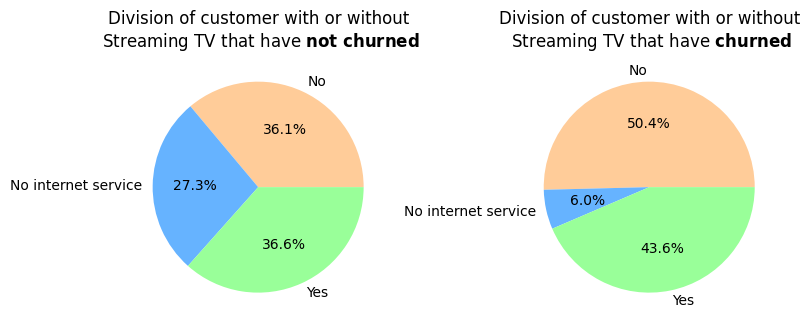

In [126]:
#Plot pie chart to visualize proportion of customers with Streaming TV that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = streamingtvxchurn, labels = ['No', 'No internet service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Streaming TV that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = streamingtvxchurn, labels = ['No', 'No internet service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Streaming TV that have ' + r'$\bf{churned}$')
plt.tight_layout();

In [127]:
#Grouping our dataset by Streaming Movies and whether or not a customer has churned.

streamingmoviesxchurn = df_churn.groupby(['StreamingMovies', 'Churn']).size().unstack(fill_value=0).reset_index()
streamingmoviesxchurn

Churn,StreamingMovies,No,Yes
0,No,1847,938
1,No internet service,1413,113
2,Yes,1914,818


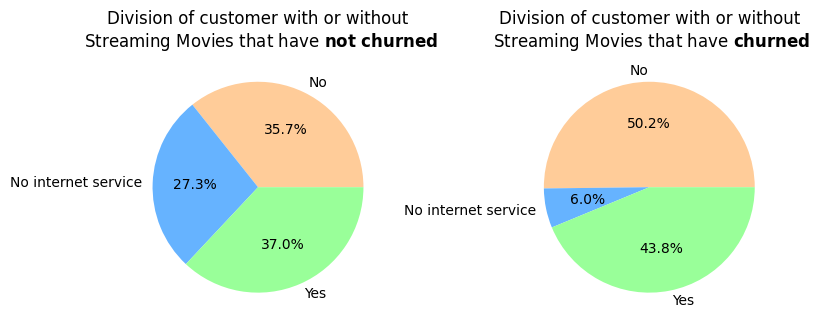

In [128]:
#Plot pie chart to visualize proportion of customers with Streaming Movies that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = streamingmoviesxchurn, labels = ['No', 'No internet service','Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Streaming Movies that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = streamingmoviesxchurn, labels = ['No', 'No internet service','Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Streaming Movies that have ' + r'$\bf{churned}$')
plt.tight_layout();

* [Content](#0)

<a id='4.3.8'></a>
### 4.3.8- Summary Product Features vs Churn

When we review all the product's features, we verify that, overall, each one by a certain extent, all the extra service that can be provided to customers reduce there chance to churn, what includes, Online Security, Online Back Up, Device Protection, Tech Support, and Streamings both for TV and Movies. Usually, telecommunication companies use offering extra service to keep customers engaged, and also to renew contracts, creating a new boudary between customers and company. Morevoer, it was also possible to verify that customer over 2/3 of customers that have churned had fiber optic internet, whereas less than 1/3 of customer that remain on the company use fiber optice internet. That may indicate a problem on related to this service. 

Online Security, Tech Support and Device protection seem to be the featues that most influence churn so far, although other variables also do it but not so significantly.

The next step will be analysing contract features against churn.

<a id='4.4'></a>
## 4.4- Analysis Contract Features vs Churn

<a id='4.4.1'></a>
### 4.4.1- Analysis Contract and Tenure vs Churn

In [132]:
#Grouping our dataset by Contract and whether or not a customer has churned.

contractxchurn = df_churn.groupby(['Contract', 'Churn']).size().unstack(fill_value=0).reset_index()
contractxchurn

Churn,Contract,No,Yes
0,Month-to-month,2220,1655
1,One year,1307,166
2,Two year,1647,48


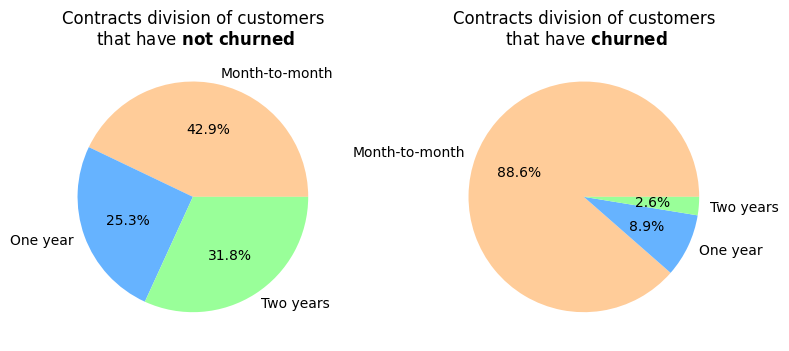

In [182]:
#Plot pie chart to visualize proportion of customers contracts against churn

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = contractxchurn, labels = ['Month-to-month', 'One year','Two years'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title("Contracts division of customers\n that have " + r'$\bf{not\ churned}$')
ax[1].pie(data = contractxchurn, labels = ['Month-to-month', 'One year','Two years'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title("Contracts division of customers\n that have " + r'$\bf{churned}$')
plt.tight_layout();

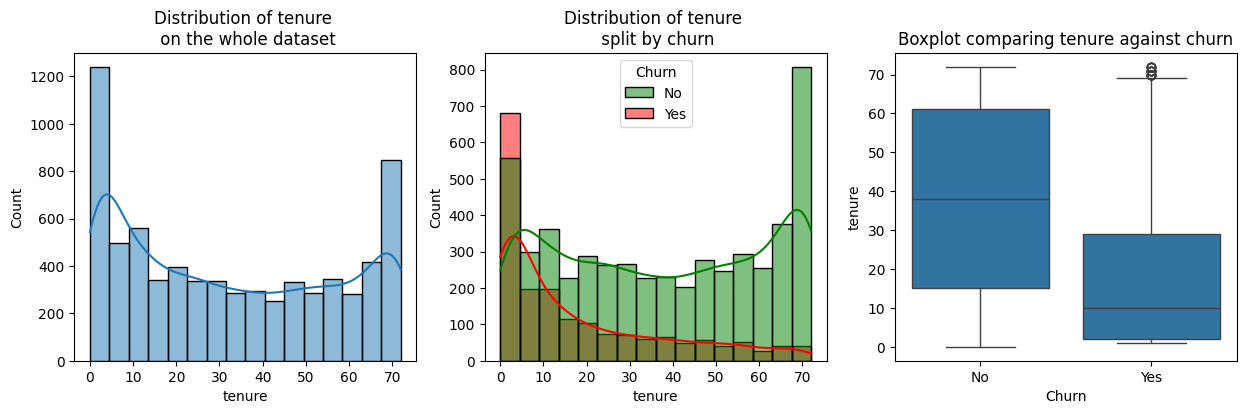

In [151]:
#Plotting distributions for comparisons of tenure against churn.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 4])


ax[0].set_title('Distribution of tenure \n on the whole dataset')
sns.histplot(data=df_churn, x='tenure', kde= True, ax=ax[0])

ax[1].set_title('Distribution of tenure \n split by churn')
sns.histplot(data=df_churn, x='tenure', hue='Churn',
             kde= True,
             ax=ax[1], 
             palette=['green','red'], legend=True)

ax[2].set_title('Boxplot comparing tenure against churn')
sns.boxplot(data = df_churn, x='Churn', y='tenure', ax=ax[2]);

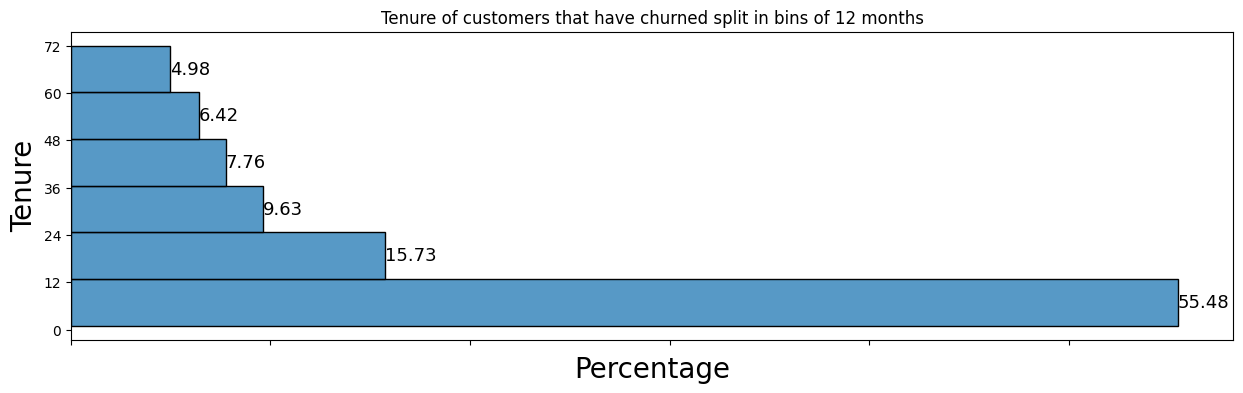

In [177]:
#Plotting tenure of only customer that have churned divided in bins of 12 months.
fig, ax = plt.subplots(figsize=[15, 4])
ax = sns.histplot(data=df_churn[df_churn['Churn']=='Yes'], y='tenure', binwidth=12,
            stat = 'percent')
ax.set(title = 'Tenure of customers that have churned split in bins of 12 months')
ax.set_xlabel('Percentage', fontsize = 20)
ax.set_ylabel('Tenure', fontsize = 20)
ax.set_yticks([0,12,24,36,48,60,72])
ax.set(xticklabels=[]);
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=13);

In our analysis, we compare the 'Contract' column with the clients that are within Churn, where we can identify that the clients that have a "Month-to-month" contract have the highest percentage within the clients with Churn with 88.55%. We can also verify that in proportion this is nearly the double of the same group among customers that have not churned. Moreover, the longer is the contract, the lesser is the percentage of customers within churn. Therefore, the company should promote longer contracts as an strategy to avoid churn. 

When we analyse this variable together with churn, we can verify that our variable tenure is not normal, and the values that have more volume are the farthest from the mean and median. That means that although we have discussed before that tenure average in our dataset is around 32, that number do not quite represent the data. As we can see, we have a high parcel of customers that have just onboarded on the company. The volume decreases within the next periods of time,reaching a minimum in around 40 months, and it starts increasing again, to reach another peak in around 72 months. When we verify the graph in red on the middle, we can understand that customers that churned are in majority recent on the company, and the long customers stay loyal to the company the less they tend to churn.

We can verify in the next graph that over 50% of the customers that have churned, did it in the first 12 months of contracts, and then figures steeply reduce until less than 5% of churn by customers that are with the company for over 5 years. 

This indicates that the company does a good job when it comes to permanence of customers, once they are settled on the company, the chances of churning reduces drasticaly. However, it seems that the onboarding process needs to be watched more closely and receive improvements.

* [Content](#0)

<a id='4.4.2'></a>
### 4.4.2- Analysis Paperless Billing and Payment Method vs Churn

In [180]:
#Grouping our dataset by PaperlessBilling and whether or not a customer has churned.

paperlessbillingxchurn = df_churn.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0).reset_index()
paperlessbillingxchurn

Churn,PaperlessBilling,No,Yes
0,No,2403,469
1,Yes,2771,1400


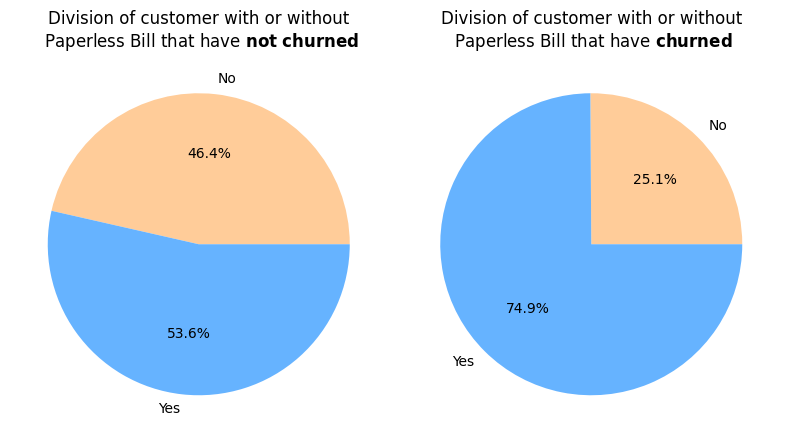

In [181]:
#Plot pie chart to visualize proportion of customers with Paperless Bill that have and have not churned.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 8])
ax[0].pie(data = paperlessbillingxchurn, labels = ['No', 'Yes'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[0].set_title('Division of customer with or without\n Paperless Bill that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = paperlessbillingxchurn, labels = ['No', 'Yes'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99']);
ax[1].set_title('Division of customer with or without\n Paperless Bill that have ' + r'$\bf{churned}$')
plt.tight_layout();

In [178]:
#Grouping our dataset by Payment Method and whether or not a customer has churned.

paymentmethodxchurn = df_churn.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0).reset_index()
paymentmethodxchurn

Churn,PaymentMethod,No,Yes
0,Bank transfer (automatic),1286,258
1,Credit card (automatic),1290,232
2,Electronic check,1294,1071
3,Mailed check,1304,308


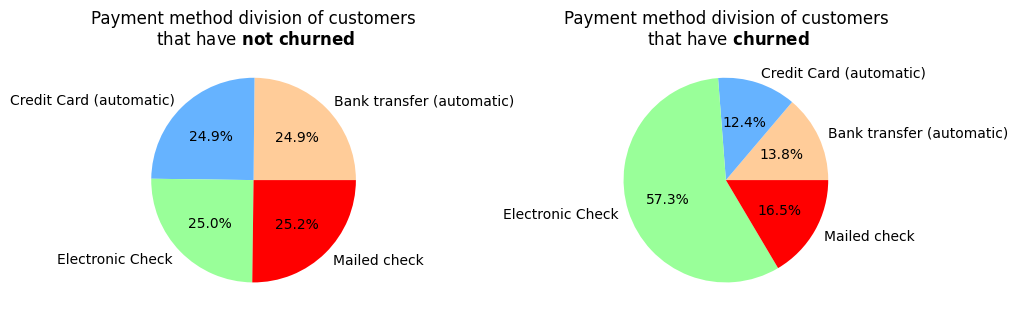

In [183]:
#Plot pie chart to visualize proportion of customers payment method against churn

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10, 14])
ax[0].pie(data = paymentmethodxchurn, labels = ['Bank transfer (automatic)', 'Credit Card (automatic)',
                                                  'Electronic Check', 'Mailed check'], x='No', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99', 'red']);
ax[0].set_title('Payment method division of customers\n that have ' + r'$\bf{not\ churned}$')
ax[1].pie(data = paymentmethodxchurn, labels = ['Bank transfer (automatic)', 'Credit Card (automatic)',
                                                  'Electronic Check', 'Mailed check'], x='Yes', autopct="%.1f%%",
       colors= ['#ffcc99','#66b3ff','#99ff99','red']);
ax[1].set_title('Payment method division of customers\n that have ' + r'$\bf{churned}$')
plt.tight_layout();

Analyzing the Electronic Billing and Payment Method variables, we can verify customers who have paperless billing are more frequent among those who have churned than those who have not. Thus the variable may influence in the variable churn. It happens the same with electronic check. Payment methods among those who have not churned is well balanced, basically a quarter for each category, and among those who have churged, Electronic check reaches nearly 60%. 

* [Content](#0)

<a id='4.4.3'></a>
### 4.4.3- Analysis Monthly Charges vs Churn

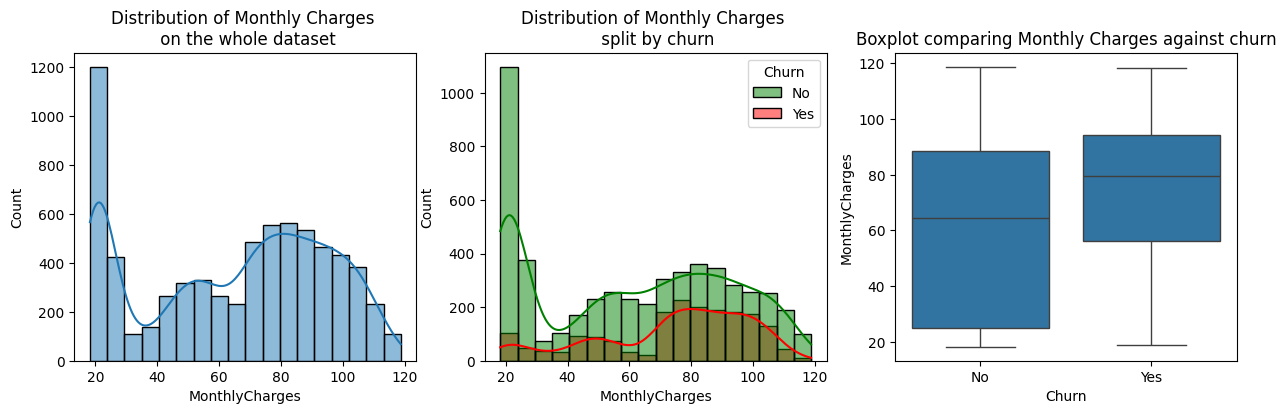

In [186]:
#Plotting distributions for comparisons of monthly charges against churn.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 4])


ax[0].set_title('Distribution of Monthly Charges \n on the whole dataset')
sns.histplot(data=df_churn, x='MonthlyCharges', kde= True, ax=ax[0])

ax[1].set_title('Distribution of Monthly Charges \n split by churn')
sns.histplot(data=df_churn, x='MonthlyCharges', hue='Churn',
             kde= True,
             ax=ax[1], 
             palette=['green','red'], legend=True)

ax[2].set_title('Boxplot comparing Monthly Charges against churn')
sns.boxplot(data = df_churn, x='Churn', y='MonthlyCharges', ax=ax[2]);

In [208]:
df_churn[df_churn['MonthlyCharges']<30].groupby(['InternetService', 'Churn']).size().unstack(fill_value=0).reset_index()

Churn,InternetService,No,Yes
0,DSL,78,49
1,No,1413,113


The Company is losing a Total Monthly amount in Churn of: 139131

Churn + Contract Month-to-month + Phone Service + Fiber Optic + Electronic Check: 5597
Churn + Contract Month-to-month + Phone Service + DSL + Electronic Check: 68282

Churn + Contract Month-to-month + No Phone Service + DSL + Electronic Check: 0
Churn + Contract Month-to-month + No Phone Service +  Fiber Optic + Electronic Check: 3180


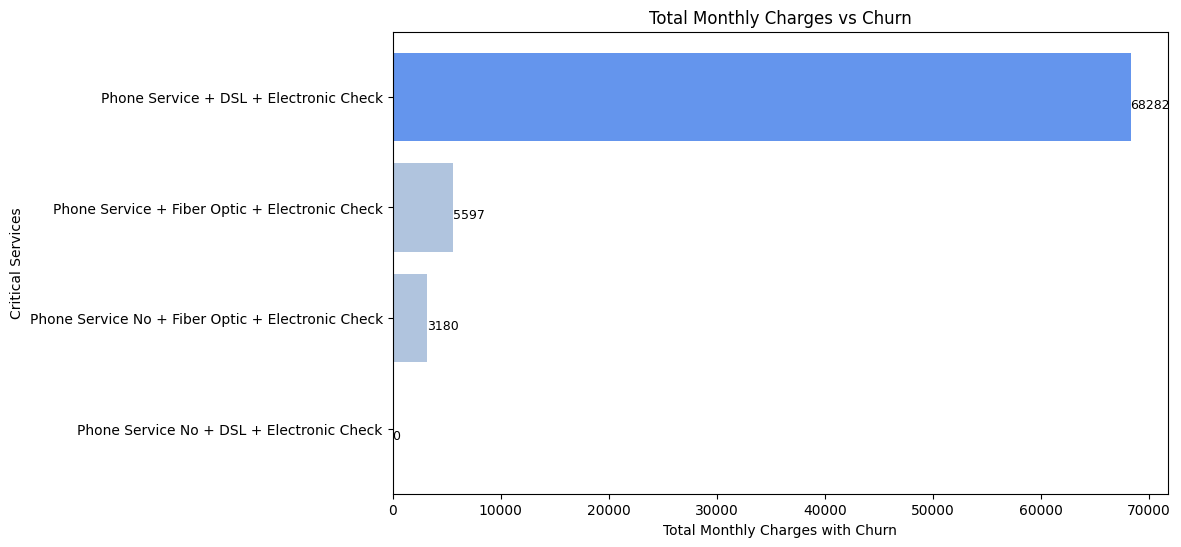

In [202]:
# Analysis Monthly Charges vs Churn


# Total Monthly Charge with Churn
total_monthly_charges = df_churn[df_churn['Churn'] =='Yes']['MonthlyCharges'].sum()
print("The Company is losing a Total Monthly amount in Churn of: {:.0f}".format(total_monthly_charges))


# Churn = Yes, Contract = Month-to-month, Phone Service = Yes, Fiber Optic Internet Service, Payment Method = Electronic Check
monthly_charges1 = df_churn[df_churn['Churn'] == 'Yes'][df_churn['Contract'] == 'Month-to-month'][df_churn['PhoneService'] == 'Yes'][df_churn['InternetService'] == 'DSL'][df_churn['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].sum()
print("\nChurn + Contract Month-to-month + Phone Service + Fiber Optic + Electronic Check: {:.0f}".format(monthly_charges1))


# Churn = Yes, Contract = Month-to-month, Phone Service = Yes, DSL Internet Service, Payment Method = Electronic Check
monthly_charges2 = df_churn[df_churn['Churn'] == 'Yes'][df_churn['Contract'] == 'Month-to-month'][df_churn['PhoneService'] == 'Yes'][df_churn['InternetService'] == 'Fiber optic'][df_churn['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].sum()
print("Churn + Contract Month-to-month + Phone Service + DSL + Electronic Check: {:.0f}".format(monthly_charges2))


# Churn = Yes, Contract = Month-to-month, Phone Service = No, DSL Internet Service, Payment Method = Electronic Check
monthly_charges3 = df_churn[df_churn['Churn'] == 'Yes'][df_churn['Contract'] == 'Month-to-month'][df_churn['PhoneService'] == 'No'][df_churn['InternetService'] == 'Fiber optic'][df_churn['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].sum()
print("\nChurn + Contract Month-to-month + No Phone Service + DSL + Electronic Check: {:.0f}".format(monthly_charges3))


# Churn = Yes, Contract = Month-to-month, Phone Service = No,  Fiber Optic Internet Service, Payment Method = Electronic Check
monthly_charges4 = df_churn[df_churn['Churn'] == 'Yes'][df_churn['Contract'] == 'Month-to-month'][df_churn['PhoneService'] == 'No'][df_churn['InternetService'] == 'DSL'][df_churn['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].sum()
print("Churn + Contract Month-to-month + No Phone Service +  Fiber Optic + Electronic Check: {:.0f}".format(monthly_charges4))


# Grafic Total Monthly Charges vs Churn
colors = ['lightsteelblue','lightsteelblue','lightsteelblue','cornflowerblue']
labels = ['Phone Service + Fiber Optic + Electronic Check', 
          'Phone Service + DSL + Electronic Check', 
          'Phone Service No + DSL + Electronic Check',
          'Phone Service No + Fiber Optic + Electronic Check']
values = [monthly_charges1, monthly_charges2, monthly_charges3, monthly_charges4]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 6))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.0010, index - 0.1, f'{value:.0f}', fontsize = 9, color ='black', weight = '0')
plt.title('Total Monthly Charges vs Churn')
plt.xlabel('Total Monthly Charges with Churn')
plt.ylabel('Critical Services')

plt.show()

In [205]:
print('Total amount monthly lost due to churn:', df_churn[df_churn['Churn']=='Yes']['MonthlyCharges'].sum())

Total amount monthly lost due to churn: 139130.85


When analyzing the 'MonthlyCharges' column, we can realize something important that we had not seen before, and this is that the Phone Service is associated with the Fiber Optic Internet Service.

This means that if the customers does not have Phone Service and wants Internet Service, the only possible option is DSL Internet Service. On the other hand, if the customer has Phone Service, they can choose between DSL or Fiber Optic.

We can also see that the total monthly amount that the company loses due to Phone Service, DSL and Electronic check is €68,282, this is equivalent to 49% of the total monthly loss due to Churn.

We can also verify that our dataset contain a big amount of people that pay less the 30 per month, in which the majority pays a low price because they do not have internet and some of them have just DSL internet. It is also possible to see that price does not seem to influence strongly churn, once the distribution for both customer that have and have not churned is very similar. The box plot shows a higher mean for montlhy prices for customer within churn, nevertheless, that happens because the high amount of customer without internet service among customer that have not churned, paying a very low price, drags the mean down.

We are also able to see, that the graph has two peaks, one around 50 and one around 80. Let us investigate this through another graphs.

* [Content](#0)

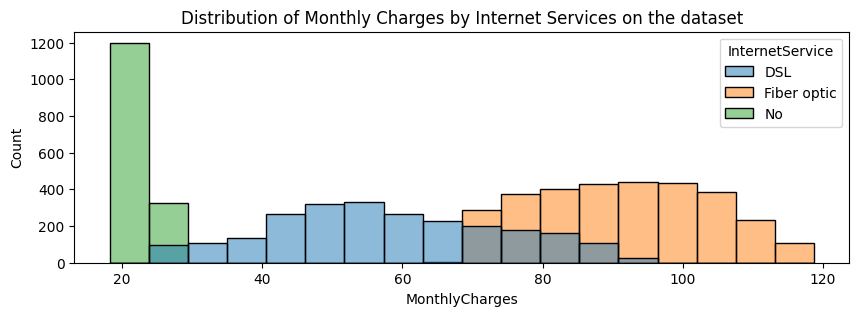

In [244]:
#Plotting distributions for comparisons of monthly charges by internet service
fig, ax = plt.subplots(figsize=[10, 3])

ax.set_title('Distribution of Monthly Charges by Internet Services on the dataset')
sns.histplot(data=df_churn, x='MonthlyCharges', hue='InternetService');

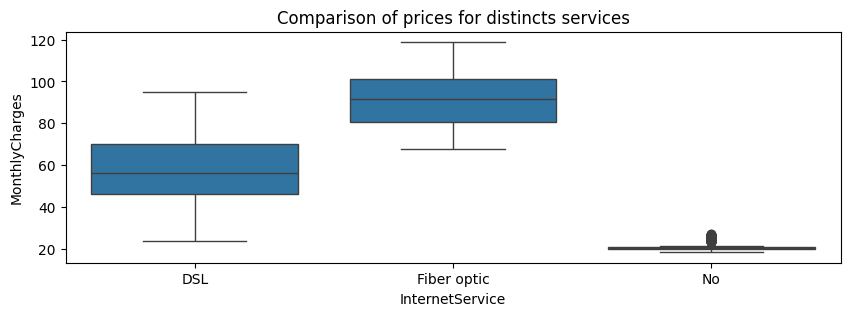

In [247]:
#Plotting distributions for comparisons of monthly charges by internet service
fig, ax = plt.subplots(figsize=[10, 3])

ax.set_title('Comparison of prices for distincts services')
sns.boxplot(data=df_churn, y='MonthlyCharges', x='InternetService');

As we can verify, the graph observed before was a composition of normal graphs when we overlap the services all together. We can verify that Monthly Charges follows an approximately normal distribution for DSL service and for Fiber Optic separetely, nevertheless not for both of them together. That happens because the minimum and maximum price for both service are very different one each other, as well as the mean. We can see from the boxplot the Fiber Optic services are more expensive. The fact that DSL distribution is slightly skeweed to the left whereas Fiber Optic seems to be more centered may mean that customers with DSL service contract less extras services. 

The graphs gives us a hint that when modelling our machine learning models, we may perform better treating the services isolated. That comes from the fact that the normal distribution within each service tends to steady the models produced and get them more reliable and accurate. In the business context, the fact we see such a difference comparing the services, might mean that we shall deal with them as separate problems, because we are dealing with different publics, and they likely have different solutions.

* [Content](#0)

<a id='4.4.4'></a>
### 4.4.4- Analysis Discounts or Extra vs Churn

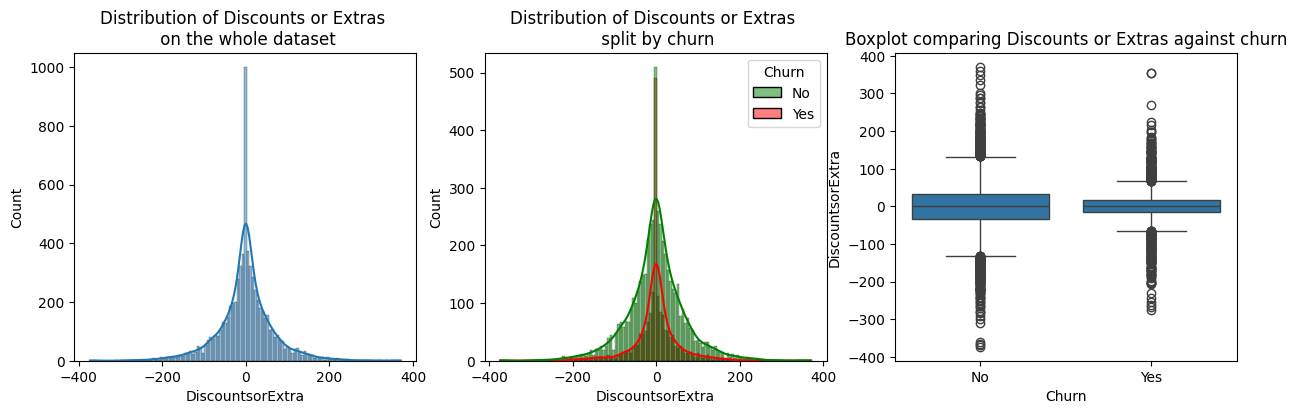

In [254]:
#Plotting distributions for comparisons of Discounts or Extras against churn.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 4])


ax[0].set_title('Distribution of Discounts or Extras \n on the whole dataset')
sns.histplot(data=df_churn, x='DiscountsorExtra', kde= True, ax=ax[0])

ax[1].set_title('Distribution of Discounts or Extras \n split by churn')
sns.histplot(data=df_churn, x='DiscountsorExtra', hue='Churn',
             kde= True,
             ax=ax[1], 
             palette=['green','red'], legend=True)

ax[2].set_title('Boxplot comparing Discounts or Extras against churn')
sns.boxplot(data = df_churn, x='Churn', y='DiscountsorExtra', ax=ax[2]);

<a id='4.5'></a>
### 4.5- Resuming our EDA

After the initial analysis, we were able to observe the structure of the data. The diagram below represents the structure of the data observed. It is important to observe, that although tenure and total charges are considered outputs on the diagram, they are being considered as variables with influence over churn so far. In addition, we also understood that a customer can only access fiber optice access if they have Phone Service, otherwise only DSL will be available for them. To make the representation more visual, this information was omitted. 

We could verify through our exploration on the data that Customer features, a part from gender, has a week influence over churn. When it comes to Service Features, the features related exclusively to phone service do not influence considerably on churn, and after analysing them through statistical methods, they may dropped from our analysis. The features related to Internet Service have strong influence over churn, generally speaking, customers that have additional services tend to churn less than those that have only the most basic. 

In regards to contract features, we verified that all the variables influence, except Monthly Charges, that seems to be the least reason for churning in this kind of feature. Overall, we verified that longer contracts help to avoid churn and that Electronic Check seems to be a problem and to influence strongly churn. 
In our opinion, as a Business Data Analytics, the analysis and previous observation of the data are essential to understand the data, understand the business and identify the objective we seek.

In regards to the outputs, we verified that customers tend to churn more when tenure is small. In other words, customer churn more in the beginning of the contract. The variable engineered to verify its influence over Churn has shown itself non related to it, and therefore it will be dropped. 

The next step will be verifying the correlations on the dataset and performing statistics tests for feature selection.

* [Content](#0)

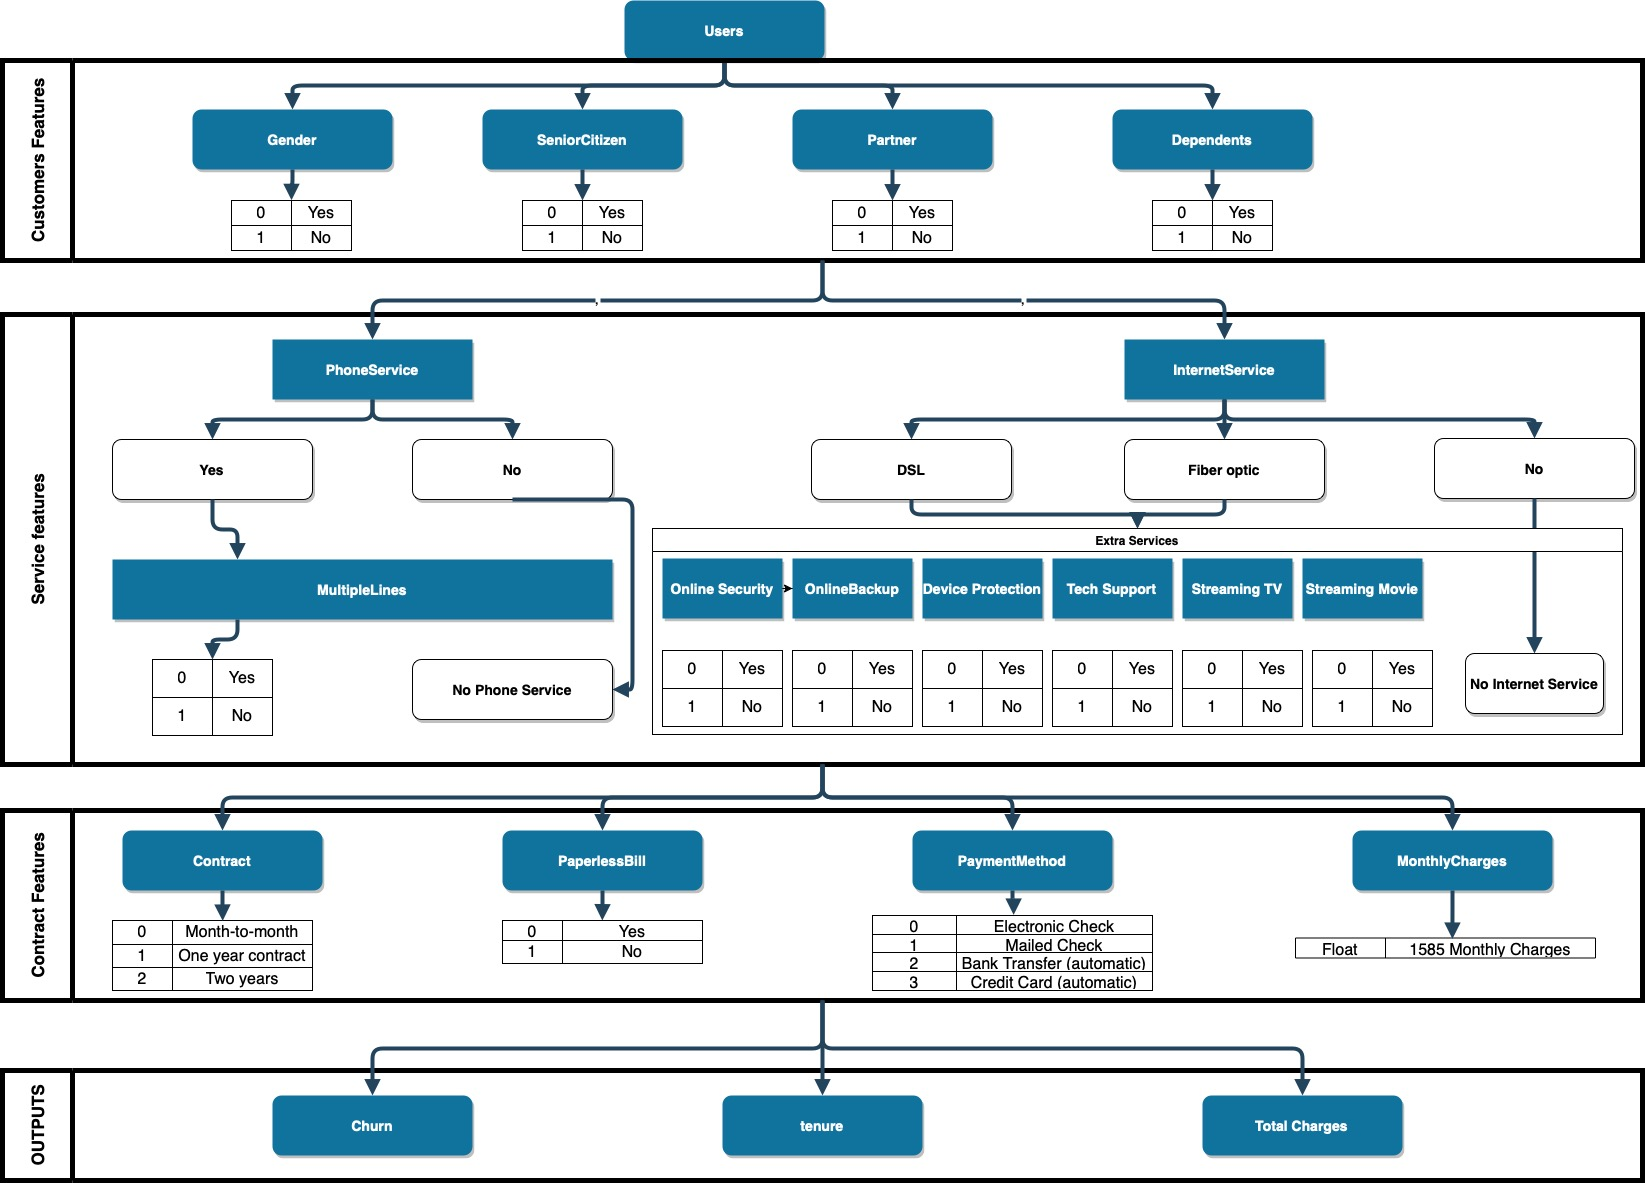

In [250]:
from IPython.display import Image
Image(filename =r'Variables Diagram.jpg')

<a id='4.6'></a>
### 4.6- Correlation Matrix

Now we will seethe correlation that the variables have between them.

Seeing the correlation of the variables is an important part but you have to remember that correlation is not causation.

Correlation measures the degree of linear relationship between two variables, that is, how one variable varies in relation to the other. However, there are many situations in which two variables may be correlated, but there is no causal relationship between them.

Therefore, it is important to note that although correlation can indicate a relationship between variables, it is not enough to establish a causal relationship between them. It is necessary to carry out more in-depth studies and analyze other factors that may influence the variables to determine if there is a causal relationship between them.

Our target variable and most of the variables in our dataset are categorical, in which some of them are not even just binary. Therefore to verify correlation between the categoricals variables, it is necessary to encode them, what means that we need to transform them into numerical variables, so that algorithms can understand relationships between them. The method that will be used in this project is the One Hot Encoding, in which each category is turned into a column, and each row will show through 1's and 0's whether or not that variable is present there. It is important to observe that binary variables do not require One Hot Encoding, they will be transfomred into 1's and 0's arbitrarialy.

In [316]:
#Visualizing information of the dataset

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [430]:
#Visualizing the first 5 rows of the dataset

df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DiscountsorExtra
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.00
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,46.80
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.45
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,62.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-10.25


In [431]:
#Converting all binary variables into numerical

df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})
df_churn['gender'] = df_churn['gender'].map({'Male': 1, 'Female': 0})   
df_churn['Partner'] = df_churn['Partner'].map({'Yes': 1, 'No': 0}) 
df_churn['Dependents'] = df_churn['Dependents'].map({'Yes': 1, 'No': 0}) 
df_churn['PhoneService'] = df_churn['PhoneService'].map({'Yes': 1, 'No': 0})
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [432]:
#Getting the name of all columns on the dataset

df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'DiscountsorExtra'],
      dtype='object')

In [320]:
#Perfoming one hot encodding through the function get_dummies on the dataset

df_churn_dummies = pd.get_dummies(data=df_churn, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'])

In [321]:
#Printing the first 5 columns of the new dataset created
df_churn_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [322]:
#Getting information about the dataset created

df_churn_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  DiscountsorExtra                         7043 no

In [323]:
#Verifying the name of all the columns of the dataset

df_churn_dummies.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'DiscountsorExtra', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',


Once dummies were got, some of the features created have no more meaning, because they only carry the same information repetedly, it is the same for all service followed by No internet service, and for multiple lines followed by no phone service, therefore this columns will be dropped.

In [324]:
df_churn_dummies.drop(columns = ['MultipleLines_No phone service','OnlineSecurity_No internet service',
                               'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
                               'TechSupport_No internet service','StreamingTV_No internet service', 
                               'StreamingMovies_No internet service'], inplace = True)

In [325]:
df_churn_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  DiscountsorExtra                         7043 no

As we can verify, all the columns were converted into numeric, and now we can perform our analysis of correlation through a correlation matrix.

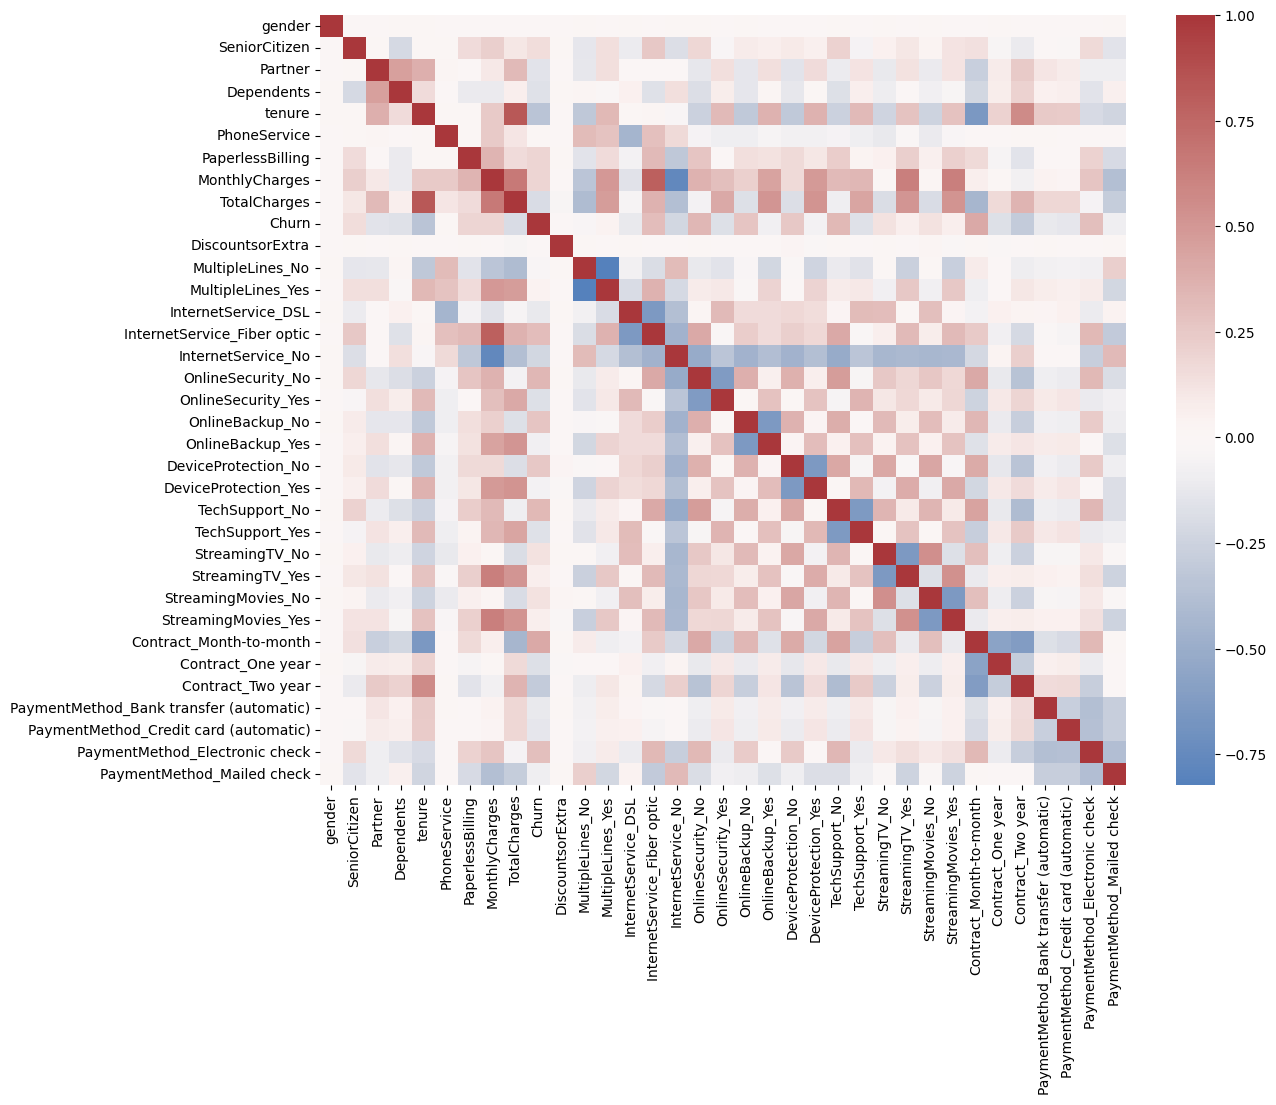

In [330]:
#Plotting a correlation matrix with the dummies values got from the previous function.

corr_matrix = df_churn_dummies.corr()

# Grafic
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(corr_matrix, cmap="vlag", center =0)
plt.show()

Colors were chosen on the diagram so that we can easily identify values very close to 0 on correlation and values increasing and decreasing towards the peaks. 

We can verify from our correlation matrix that in regards to churn, the columns gender, PhoneService, DiscountsorExtras, and Multiples Lines, present a nearly white color, and therefore nearly 0 correlation. This had been point before, and the correlation matrix confirms the previous analysis. With the remaining columns, it is possible to distinguish some colors, what makes them potential for the next analysis. 

The stronger correlations that we observe in the whole graph are Total Charges x tenure, Fiber Optic internet x Monthly Charges and No internet x Monthly Charges.

In [332]:
#Verifying the values of correlation with churn in descending order.

corr_matrix['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
DiscountsorExtra                          -0.000307
gender                                    -0.008612
MultipleLine

<a id='4.7'></a>
### 4.7- Observations

So far, this project has been following the same structure of Part 1, however changing some concepts that were understood to have a better way to be treated, visualizations, and enhancing the discussion in regards to the business context. However, the next section 'Modeling' will not be changed in regards to technics applied, and it will be only refformated in regards to texts, so that it can follow the same structure of the whole project. Results may slightly change due to different procedures in Data Cleaning and Engineering, but the technics performed will be exactly the same. 

Afterwards, a new step of preparation will be performed according with new concepts learner throughout this project, and a new modeling will be performed. Below, the only feature that will be dropped, that was already analysed and we know it has no predictive power over churn, is DiscountsofExtra, so that we can have the same data structure previously explored.

In [344]:
#Dropping column DiscountsorExtra from the dataset

df_churn_dummies.drop(columns = ['DiscountsorExtra'], inplace=True)

<a id='5'></a>
# 5. Modeling

In [34]:
#Creating lis with all the model that will be applied

models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In the scope of this project we will apply the 6 models listed above. All the models will be applied in different percentages of split of our dataset, 10% test and 90% training, 20% test and 80% training, and 30% test and 70% training, searching to sort the better performance and the best model. Afterwards we will try to improve this model through different technics and reach a final result. 

The metric used for this part of the project was accuracy, that represents the total amount of correct predictions out of all predictions. It's use will be discussed later.

<a id='5.1'></a>
## 5.1- Methodology performed in first part of the project

<a id='5.1.1'></a>
### 5.1.1- Applying the models with 10% test and 90% training

In [345]:
#Dividing the dataset into dependent and independent variables
X = df_churn_dummies.drop('Churn', axis=1) #independent variables
y = df_churn_dummies['Churn'] #dependent variable (Target)

#Splitting the dataset using 10% for the test size
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

#Printing the shapes of the parts of the dataset created
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(6338, 33) (705, 33) (6338,) (705,)


In [346]:
#Printing values for churn in the dependent variable. 1 represent customers who have
#churned and two customers who haven't


y_train.value_counts()

Churn
0    4641
1    1697
Name: count, dtype: int64

In [347]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.736819 (0.025061)
SVM: 0.771859 (0.014836)
KNN: 0.765698 (0.015271)
RFC: 0.789048 (0.017621)
CART: 0.733985 (0.017997)
LR: 0.800719 (0.018937)


Accuracy Score:  0.8127659574468085

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       533
           1       0.63      0.57      0.60       172

    accuracy                           0.81       705
   macro avg       0.75      0.73      0.74       705
weighted avg       0.81      0.81      0.81       705


Confusion Matrix: 
 [[475  58]
 [ 74  98]]


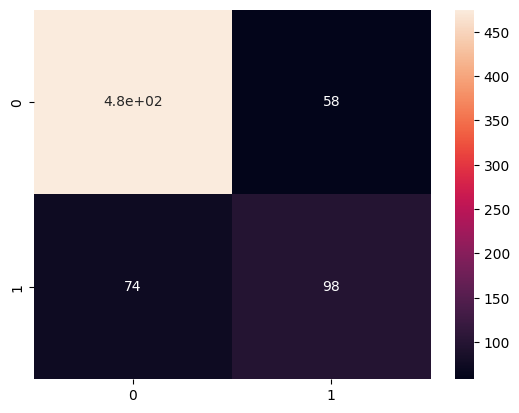

In [348]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_validation, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

* [Content](#0)

<a id='5.1.2'></a>
### 5.1.2- Applying the models with 20% test and 80% training

In [356]:
#Splitting the dataset using 20% for the test size

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

#Printing the shapes of the parts of the dataset created

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5634, 33) (1409, 33) (5634,) (1409,)


In [357]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.735014 (0.030762)
SVM: 0.769793 (0.018029)
KNN: 0.767488 (0.021144)
RFC: 0.788416 (0.019586)
CART: 0.727536 (0.025576)
LR: 0.802631 (0.023340)


Accuracy Score:  0.8105039034776437

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409


Confusion Matrix: 
 [[941 120]
 [147 201]]


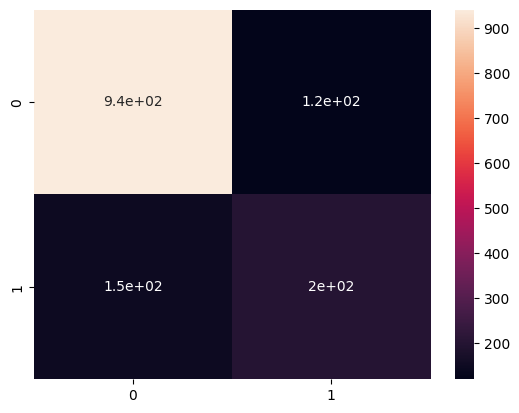

In [358]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

* [Content](#0)

<a id='5.1.3'></a>
### 5.1.3- Applying the models with 30% test and 70% training

In [359]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(4930, 33) (2113, 33) (4930,) (2113,)


In [360]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.731868 (0.023423)
SVM: 0.765740 (0.017405)
KNN: 0.754378 (0.024537)
RFC: 0.782168 (0.024045)
CART: 0.709941 (0.025573)
LR: 0.803057 (0.029875)


Accuracy Score:  0.8088026502602934

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113


Confusion Matrix: 
 [[1401  184]
 [ 220  308]]


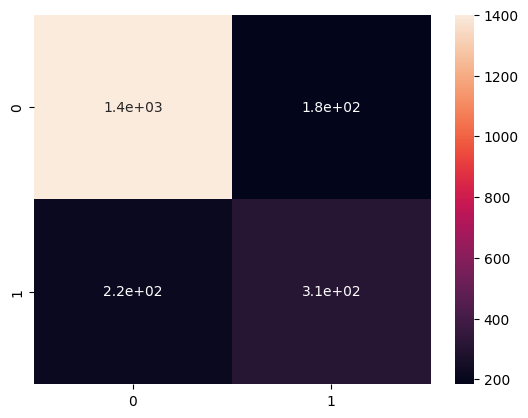

In [361]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

* [Content](#0)

<a id='5.1.4'></a>
### 5.1.4- Applying the Logistic Regression model with 20% testing and 80% training using the SMOTE technique

In [362]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [363]:
# SMOTE

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(8226, 33) (1409, 33) (8226,) (1409,)


Accuracy Score:  0.7955997161107168

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1061
           1       0.57      0.67      0.62       348

    accuracy                           0.80      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.81      0.80      0.80      1409


Confusion Matrix: 
 [[889 172]
 [116 232]]


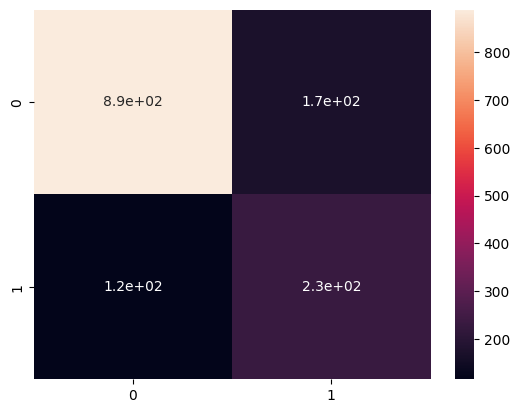

In [364]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

* [Content](#0)

<a id='5.1.5'></a>
### 5.1.5- Applying the Logistic Regression model with 20% testing and 80% training using the NearMiss technique

In [365]:
from imblearn.under_sampling import NearMiss

# NearMiss

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an object by calling a methof NearMiss()
nr = NearMiss()

# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(3042, 33) (1409, 33) (3042,) (1409,)


Accuracy Score:  0.7388218594748048

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1061
           1       0.48      0.76      0.59       348

    accuracy                           0.74      1409
   macro avg       0.69      0.75      0.70      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix: 
 [[777 284]
 [ 84 264]]


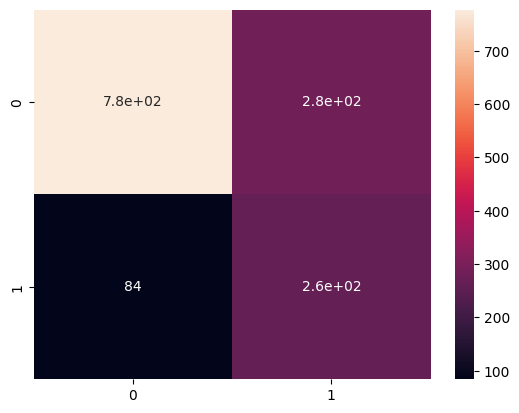

In [366]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

* [Content](#0)

<a id='5.1.6'></a>
### 5.1.6- Observation

After having carried out the different models with different percentages in testing and training, we can conclude the following:

For the data that we are analyzing, the best resulting model is the Logistic Regression with 20% testing and 80% training, which gives us the following information:


The Accuracy Score of the model is 0.8105, which indicates that the model is capable of correctly predicting 81.05% of the cases.


The Classification Report shows us the metrics of precision (precision), recall (recall) and F1-score (f1-score) for each Churn class (0 and 1).


. Precision tells us how accurate the model is when predicting a given class.

. Recall indicates how well cases of the given class recover.

. The F1-score is a combined measure of accuracy and recovery.


After having clarified these points we can indicate that:


The report shows us that the model has a good precision for class 0 (87%) and a moderate precision for class 1 (63%). Recall is high for class 0 (89%) and low for class 1 (58%). The F1 score also reflects these trends, being higher for class 0 (88%) and lower for class 1 (61%).

The confusion matrix shows us the number of true positives (TP), false positives (FP), true negatives (TN) and false negatives (FN) in the model. In this case, the model correctly predicted 941 Churn equals 0 (TN) and 201 Churn equals 1 (TP).

However, it also incorrectly predicted 120 instances of Churn equal to 0 as Churn equal to 1 (FP) and 147 instances of Churn equal to 1 as Churn equal to 0 (FN).

In general, the Logistic Regression model has good accuracy in predicting the majority class of Churn equal to 0 but has difficulties correctly predicting the minority class of Churn equal to 1. This is because our data is unbalanced, which mostly has Churn data equal to 0 at 73.46% and Churn data equal to 1 at 26.54%.

In order to try to perform better, we apply the Logistic Regression model with 20% testing and 80% training using the SMOTE technique to add synthetic data to our minority variable equivalent to Churn equal to 1

In terms of Accuracy Score, the Logistic Regression model without applying the SMOTE technique (0.8105) performs better than the model applying the SMOTE technique (0.7956).

However, when the Classification Report metrics are analyzed, it is observed that the model applying the SMOTE technique presents better performance in terms of recall for the minority class (Churn = 1).

We can see this reflected in the confusion matrix, where it is observed that the model applying the SMOTE technique has fewer false negatives (116) than the model without the technique (147).

In general, the choice of the model depends on the business objective, for this reason, an initial analysis of the business and our data is of the utmost importance. This way we will be able to detect the importance that is given to each of the metrics that we are evaluating.

As we already know in the previous analysis, we are looking for a model that has a better performance for the detection of the minority class, in this case, the Clients with Churn (1), knowing this we can opt for the model that uses the SMOTE technique.

* [Content](#0)

<a id='5.2'></a>
## 5.2- New methodology explored in the second part of the project

<a id='5.2.1'></a>
### 5.2.1- Changing the evaluation metric used on the models

Although we have explained concepts regarding to the metrics that have been used to reach the machine learning model that has been built so far, we shall go back to our business context to analyse what these metrics represent in it. Our dataset brings information about customer characteristics, services contracted by them, and contract assets, and whether or not these customers have churned. In the context of the company and of retention of customers, both customers that have churned and customers that have not churned are important, because both of them should receive different marketing approachs to either recover a lost customer or avoid that a customer churn on future. 

We have been focusing on a model that can predict accurately whether or not a customer has churned. However, the another interpretation to our model could be undercovering customers that should have churned according to our model, but have not. Because these are the customers that sectors related to retention, customer success, quality of service, in telecomunication companies must focus to avoid future churn. 

Said that, we understand that we have been exploring the wrong metric to evaluate how well and useful our machine learning model is. The focus should be finding the model that reduces the number of false negatives, even though this model might identify much more false positives. The metric that better represents this aim is recall, in which we aim to increase the customer correctly identified as positive, independent of finding false positives.

The reason is because the false positive is exactly understood as customers identified by the model as positive to churn, but that have not churned, therefore customers that are likely unsatisfied and may churn soon. On the other hand, false negatives is either a breach in our system to accurately identify reasons why customers churned, or customers that have churned for reasons that are out of the context of our dataset, for instance, customers that churned beucase they moved to an area uncovered by the company. The first reason can be improved through tunning the model and testing different models, though, the second is imprevisible, and cannot be predicted.

In [185]:
scoring = 'recall'

In [369]:
<a id='5.2.2'></a>
### 5.2.2- Splitting the datas

SyntaxError: invalid syntax (493211433.py, line 1)

In [367]:
# Define ANOVA test (for a categorical feature against a numerical target)

def anova_log(df_churn, feature):
    model_ols = ols('Churn ~ {}'.format(feature), data=df_churn).fit()
    anova_table = anova_lm(model_ols, typ=2)
    return anova_table

In [368]:
# Using ANOVA for statistical testing of features.

categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                'PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

anova_for_categoricals2 = []
for i in categoricals:
    anova_for_categoricals2.append([i,anova_log(df_churn, i).loc[i,'PR(>F)']])

anova_for_categoricals2 = pd.DataFrame(anova_for_categoricals2, columns=['feature','anova pvalue'])
anova_for_categoricals2.columns = [str(column) for column in anova_for_categoricals2.columns]
anova_for_categoricals2

,feature,anova pvalue
0,gender,4.699045e-01
1,SeniorCitizen,3.839860e-37
2,Partner,6.220731e-37
3,Dependents,9.140433e-44
4,PhoneService,3.163148e-01
5,MultipleLines,3.456954e-03
6,InternetService,1.457260e-168
7,OnlineSecurity,2.426572e-197
8,OnlineBackup,2.837801e-137
9,DeviceProtection,5.214424e-127


The ANOVA is used when we want to verify whether a categorical variables is correlated with a numerical variable, and it takes as hyphotesis.

Null Hypothesis: 

If p-value < 0.0

## .- Applying the models with 10% test and 90% training

In [234]:
#Splitting the dataset in 10 and 90%
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(6338, 39) (705, 39) (6338,) (705,)


In [187]:
y_train.value_counts()

Churn
False    4641
True     1697
Name: count, dtype: int64

In [188]:
y_validation.value_counts()

Churn
False    533
True     172
Name: count, dtype: int64

In [236]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.777248 (0.045323)
SVM: 0.310588 (0.041515)
KNN: 0.460280 (0.046050)
RFC: 0.482003 (0.037575)
CART: 0.518004 (0.046472)
LR: 0.552696 (0.043437)


Accuracy Score:  0.7432624113475177

Classification Report: 
               precision    recall  f1-score   support

       False       0.93      0.72      0.81       533
        True       0.48      0.83      0.61       172

    accuracy                           0.74       705
   macro avg       0.71      0.77      0.71       705
weighted avg       0.82      0.74      0.76       705



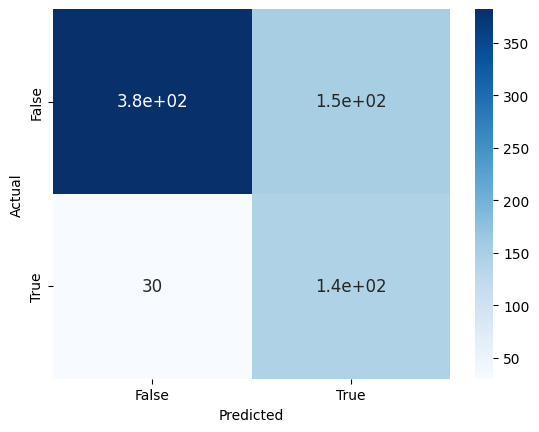

In [235]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

## .- Applying the models with 20% test and 80% training

In [191]:
#Splitting the dataset in 20 and 80%
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5634, 39) (1409, 39) (5634,) (1409,)


In [192]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.772582 (0.063192)
SVM: 0.299821 (0.045604)
KNN: 0.471437 (0.049225)
RFC: 0.485270 (0.065613)
CART: 0.499009 (0.048891)
LR: 0.547676 (0.067575)


Accuracy Score:  0.7501774308019872

Classification Report: 
               precision    recall  f1-score   support

       False       0.93      0.73      0.81      1061
        True       0.50      0.82      0.62       348

    accuracy                           0.75      1409
   macro avg       0.71      0.78      0.72      1409
weighted avg       0.82      0.75      0.77      1409



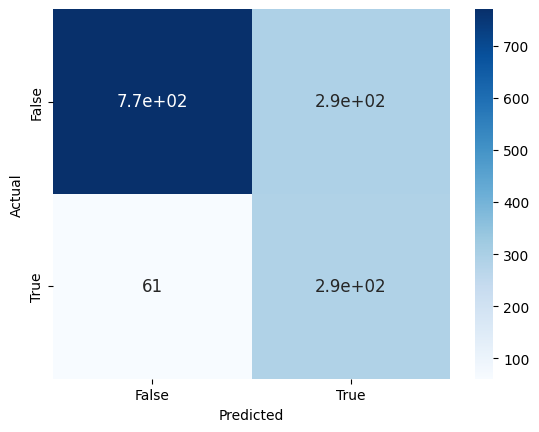

In [193]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

## .- Applying the models with 30% test and 70% training

In [244]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(4930, 39) (2113, 39) (4930,) (2113,)


In [195]:
y_train.value_counts()

Churn
False    3589
True     1341
Name: count, dtype: int64

In [240]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.772582 (0.063055)
SVM: 0.494429 (0.061470)
KNN: 0.508296 (0.055935)
RFC: 0.484621 (0.065168)
CART: 0.497667 (0.044844)
LR: 0.553589 (0.071598)


Accuracy Score:  0.7501183151916706

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.73      0.81      1585
        True       0.50      0.82      0.62       528

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.82      0.75      0.77      2113



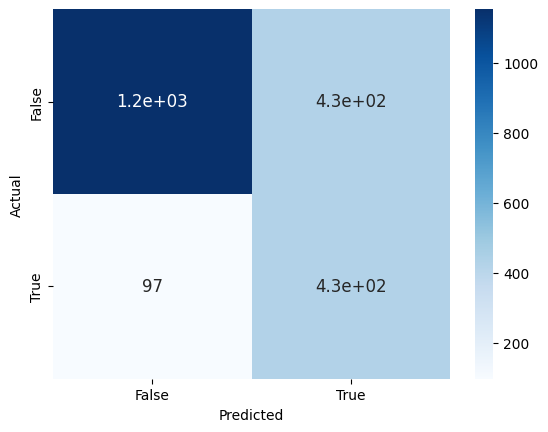

In [197]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

## .- Testing different models with 10% testing and 90% training using the SMOTE technique

In [198]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [243]:
# SMOTE

smt = SMOTE()

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, y_train = smt.fit_resample(X_train, y_train)


print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(9282, 39) (705, 39) (9282,) (705,)


In [200]:
y_train.value_counts()

Churn
True     4641
False    4641
Name: count, dtype: int64

In [201]:
y_validation.value_counts()

Churn
False    533
True     172
Name: count, dtype: int64

In [202]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.836236 (0.021371)
SVM: 0.820083 (0.021837)
KNN: 0.846370 (0.023892)
RFC: 0.839693 (0.024381)
CART: 0.822886 (0.020408)
LR: 0.839472 (0.020861)


Accuracy Score:  0.8085106382978723

Classification Report: 
               precision    recall  f1-score   support

       False       0.87      0.87      0.87       533
        True       0.61      0.61      0.61       172

    accuracy                           0.81       705
   macro avg       0.74      0.74      0.74       705
weighted avg       0.81      0.81      0.81       705



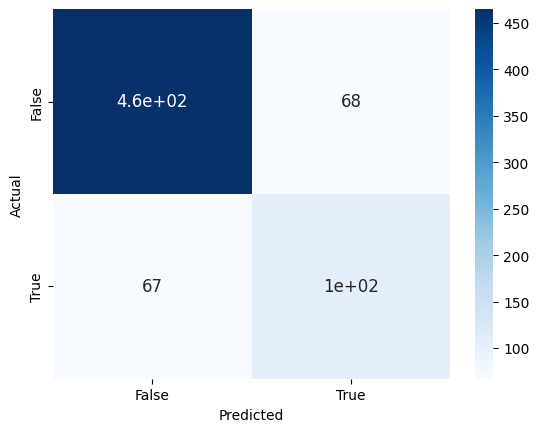

In [203]:
model = LogisticRegression(solver='newton-cg', multi_class='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

Accuracy Score:  0.7546099290780142

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.74      0.82       533
        True       0.50      0.81      0.62       172

    accuracy                           0.75       705
   macro avg       0.71      0.77      0.72       705
weighted avg       0.82      0.75      0.77       705



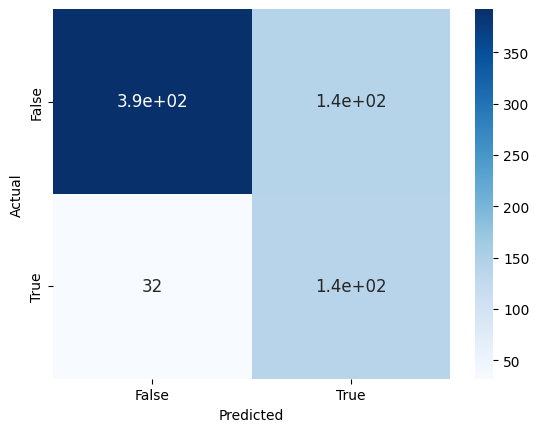

In [204]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

## Tunning hyperparameters on the models

In [205]:
#https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
k_folds = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = GaussianNB(), param_grid = parameters, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring=scoring)

In [206]:
grid_search_rf.fit(X_train, y_train)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

In [207]:
grid_search_rf.best_score_

0.8636044102412311

In [208]:
# printing the optimal Coefficient of Determination and hyperparameters
print('We can get r2 of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get r2 of 0.8636044102412311 using {'var_smoothing': 5.336699231206302e-08}


Accuracy Score:  0.7546099290780142

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.74      0.82       533
        True       0.50      0.81      0.62       172

    accuracy                           0.75       705
   macro avg       0.71      0.77      0.72       705
weighted avg       0.82      0.75      0.77       705



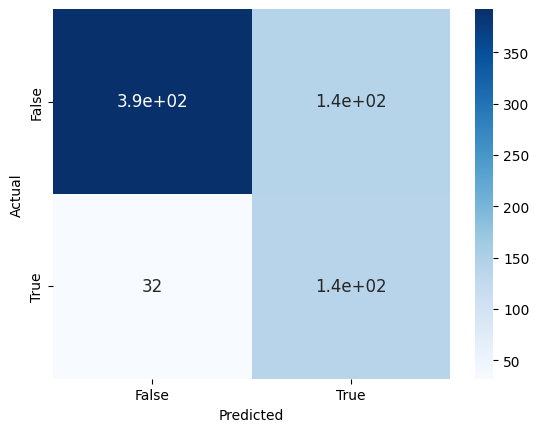

In [209]:
modelOptimal = GaussianNB(var_smoothing = 2.848035868435799e-08)
modelOptimal.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

In [210]:
parameters = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
             'penalty' : ['l1', 'l2', 'elasticnet', None],
              'C' : [100, 10, 1.0, 0.1, 0.01]}
k_folds = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring=scoring)


In [211]:
grid_search_rf.fit(X_train, y_train)

Fitting 20 folds for each of 80 candidates, totalling 1600 fits


/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C a

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Envi

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C a

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C a

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C a

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not conve

/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/arthurassis/anaconda3/envs/Environment1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C a

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             scoring='recall', verbose=1)

In [212]:
# printing the optimal Coefficient of Determination and hyperparameters
print('We can get r2 of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get r2 of 0.8696361180997483 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Accuracy Score:  0.7546099290780142

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.74      0.82       533
        True       0.50      0.81      0.62       172

    accuracy                           0.75       705
   macro avg       0.71      0.77      0.72       705
weighted avg       0.82      0.75      0.77       705



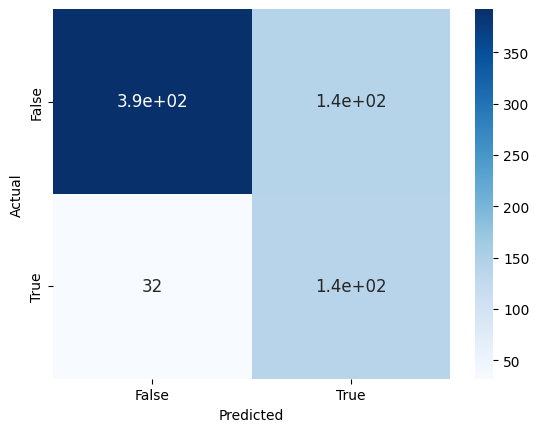

In [213]:
modelOptimal = LogisticRegression(penalty = 'l2', solver = 'newton-cg')
modelOptimal.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

## .- Applying the Logistic Regression model with 20% testing and 80% training using the NearMiss technique

In [214]:
from imblearn.under_sampling import NearMiss

# NearMiss

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an object by calling a methof NearMiss()
nr = NearMiss()

# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(3042, 39) (1409, 39) (3042,) (1409,)


In [215]:
y_train.value_counts()

Churn
False    1521
True     1521
Name: count, dtype: int64

In [216]:
y_validation.value_counts()

Churn
False    1061
True      348
Name: count, dtype: int64

In [217]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.767977 (0.046322)
SVM: 0.677179 (0.043380)
KNN: 0.553623 (0.046341)
RFC: 0.662773 (0.055780)
CART: 0.610133 (0.049374)
LR: 0.723932 (0.049417)


Accuracy Score:  0.7432624113475177

Classification Report: 
               precision    recall  f1-score   support

       False       0.93      0.72      0.81       533
        True       0.48      0.83      0.61       172

    accuracy                           0.74       705
   macro avg       0.71      0.77      0.71       705
weighted avg       0.82      0.74      0.76       705



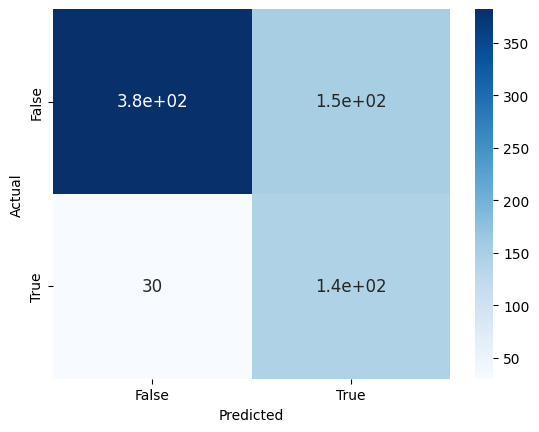

In [36]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

In [37]:
from sklearn.inspection import permutation_importance

In [65]:
imps = permutation_importance(model, X_validation, y_validation, n_repeats = 10, scoring = 'recall')
print(imps.importances_mean)

[ 0.01918605  0.01104651  0.00813953 -0.00290698 -0.00290698 -0.00290698
 -0.00290698 -0.00116279 -0.00116279  0.00174419  0.00174419 -0.00174419
 -0.00174419  0.         -0.00232558 -0.00465116  0.01453488  0.04127907
  0.0122093   0.00290698 -0.00116279 -0.00872093  0.00116279  0.00290698
  0.0122093   0.00697674  0.00406977  0.00406977  0.00232558  0.00290698
  0.04360465  0.00755814  0.18197674  0.00465116  0.00465116  0.00116279
  0.01162791  0.00116279 -0.00290698]


In [56]:
imps.importances_mean.shape

(39,)

# Splitting the dataset

In [371]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DiscountsorExtra
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0.00
1,1,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,46.80
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,-0.45
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,62.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,-10.25


In [453]:
df_churn_fiberoptic = df_churn[df_churn['InternetService'] == 'Fiber optic'].reset_index().drop(columns=['index', 'InternetService'])
df_churn_DSL = df_churn[df_churn['InternetService'] == 'DSL']

In [454]:
df_churn_fiberoptic.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DiscountsorExtra
0,0,0,0,0,2,1,No,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,-10.25
1,0,0,0,0,8,1,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1,-23.30
2,1,0,0,1,22,1,Yes,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,10.80
3,0,0,1,0,28,1,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1,-111.65
4,1,0,1,0,58,1,Yes,No,No,Yes,No,Yes,Yes,One year,0,Credit card (automatic),100.35,5681.10,0,139.20


In [455]:
# Define ANOVA test (for a categorical feature against a numerical target)

def anova_log(df_churn_fiberoptic, feature):
    model_ols = ols('Churn ~ {}'.format(feature), data=df_churn_fiberoptic).fit()
    anova_table = anova_lm(model_ols, typ=2)
    return anova_table

In [456]:
# Using ANOVA for statistical testing of features.

categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                'PhoneService', 'MultipleLines', 
                'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

anova_for_categoricals2 = []
for i in categoricals:
    anova_for_categoricals2.append([i,anova_log(df_churn_fiberoptic, i).loc[i,'PR(>F)']])

anova_for_categoricals2 = pd.DataFrame(anova_for_categoricals2, columns=['feature','anova pvalue'])
anova_for_categoricals2.columns = [str(column) for column in anova_for_categoricals2.columns]
anova_for_categoricals2

,feature,anova pvalue
0,gender,3.289153e-01
1,SeniorCitizen,2.233239e-04
2,Partner,5.753545e-20
3,Dependents,1.889841e-11
4,PhoneService,2.424719e-01
5,MultipleLines,7.235528e-04
6,OnlineSecurity,1.144972e-44
7,OnlineBackup,6.799474e-31
8,DeviceProtection,2.490800e-25
9,TechSupport,6.094304e-43


In [457]:
df_churn_fiberoptic.drop(columns=['gender', 'PhoneService', 'DiscountsorExtra'], inplace=True)

In [458]:
df_churn_fiberoptic.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,2,No,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
1,0,0,0,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
2,0,0,1,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
3,0,1,0,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
4,0,1,0,58,Yes,No,No,Yes,No,Yes,Yes,One year,0,Credit card (automatic),100.35,5681.10,0


In [459]:
#Converting all binary variables into numerical

df_churn_fiberoptic['MultipleLines'] = df_churn_fiberoptic['MultipleLines'].map({'Yes': 1, 'No': 0})
df_churn_fiberoptic['OnlineSecurity'] = df_churn_fiberoptic['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df_churn_fiberoptic['OnlineBackup'] = df_churn_fiberoptic['OnlineBackup'].map({'Yes': 1, 'No': 0})
df_churn_fiberoptic['DeviceProtection'] = df_churn_fiberoptic['DeviceProtection'].map({'Yes': 1, 'No': 0})
df_churn_fiberoptic['TechSupport'] = df_churn_fiberoptic['TechSupport'].map({'Yes': 1, 'No': 0})
df_churn_fiberoptic['StreamingTV'] = df_churn_fiberoptic['StreamingTV'].map({'Yes': 1, 'No': 0})
df_churn_fiberoptic['StreamingMovies'] = df_churn_fiberoptic['StreamingMovies'].map({'Yes': 1, 'No': 0})

In [460]:
df_churn_fiberoptic

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,2,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
1,0,0,0,8,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
2,0,0,1,22,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
3,0,1,0,28,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
4,0,1,0,58,1,0,0,1,0,1,1,One year,0,Credit card (automatic),100.35,5681.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0,0,0,67,1,1,1,1,0,1,0,Month-to-month,1,Credit card (automatic),102.95,6886.25,1
3092,0,0,0,19,0,0,0,0,0,1,0,Month-to-month,1,Bank transfer (automatic),78.70,1495.10,0
3093,0,1,1,72,1,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
3094,1,1,0,4,1,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [461]:
#Perfoming one hot encodding through the function get_dummies on the dataset

df_churn_fiberoptic_dummies = pd.get_dummies(data=df_churn_fiberoptic, columns = ['Contract', 'PaymentMethod'])

In [462]:
df_churn_fiberoptic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            3096 non-null   int64  
 1   Partner                                  3096 non-null   int64  
 2   Dependents                               3096 non-null   int64  
 3   tenure                                   3096 non-null   int64  
 4   MultipleLines                            3096 non-null   int64  
 5   OnlineSecurity                           3096 non-null   int64  
 6   OnlineBackup                             3096 non-null   int64  
 7   DeviceProtection                         3096 non-null   int64  
 8   TechSupport                              3096 non-null   int64  
 9   StreamingTV                              3096 non-null   int64  
 10  StreamingMovies                          3096 no

In [463]:
y_fiberoptic = df_churn_fiberoptic_dummies['Churn']
X_fiberoptic = df_churn_fiberoptic_dummies.drop(columns = ['Churn'])

In [464]:
X_fiberoptic.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,2,0,0,0,0,0,0,...,1,70.70,151.65,True,False,False,False,False,True,False
1,0,0,0,8,1,0,0,1,0,1,...,1,99.65,820.50,True,False,False,False,False,True,False
2,0,0,1,22,1,0,1,0,0,1,...,1,89.10,1949.40,True,False,False,False,True,False,False
3,0,1,0,28,1,0,0,1,1,1,...,1,104.80,3046.05,True,False,False,False,False,True,False
4,0,1,0,58,1,0,0,1,0,1,...,0,100.35,5681.10,False,True,False,False,True,False,False


In [465]:
X_train_fo, X_validation_fo, y_train_fo, y_validation_fo = train_test_split(X_fiberoptic,
                                                                            y_fiberoptic,
                                                                            test_size=0.2, random_state=1)

print(X_train_fo.shape, X_validation_fo.shape, y_train_fo.shape, y_validation_fo.shape)

(2476, 21) (620, 21) (2476,) (620,)


In [466]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_fo, y_train_fo, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.821970 (0.051499)
SVM: 0.346589 (0.055046)
KNN: 0.571335 (0.061398)
RFC: 0.622841 (0.059086)
CART: 0.583980 (0.062359)
LR: 0.710486 (0.055225)


Accuracy Score:  0.6741935483870968

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.59      0.69       373
           1       0.56      0.80      0.66       247

    accuracy                           0.67       620
   macro avg       0.69      0.70      0.67       620
weighted avg       0.72      0.67      0.68       620



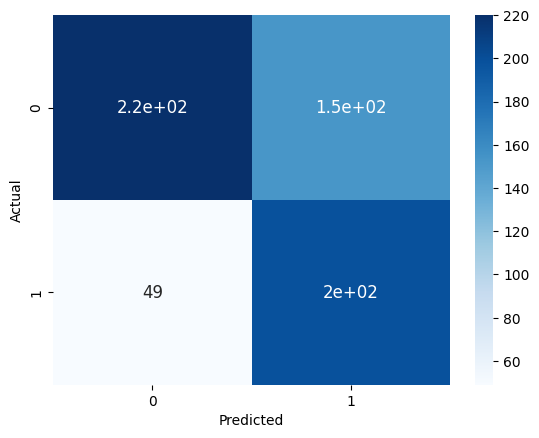

In [467]:
model = GaussianNB()
model.fit(X_train_fo, y_train_fo)
y_pred_fo = model.predict(X_validation_fo)

print("Accuracy Score: ", accuracy_score(y_validation_fo, y_pred_fo))

print("\nClassification Report: "'\n', classification_report(y_validation_fo, y_pred_fo))

cm = pd.DataFrame(confusion_matrix(y_validation_fo, y_pred_fo), 
                     columns=np.unique(y_validation_fo), 
                     index = np.unique(y_validation_fo))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

# Shap Values

In [57]:
import shap

Accuracy Score:  0.7960246095598675

Classification Report: 
               precision    recall  f1-score   support

       False       0.85      0.88      0.87      1585
        True       0.60      0.53      0.57       528

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



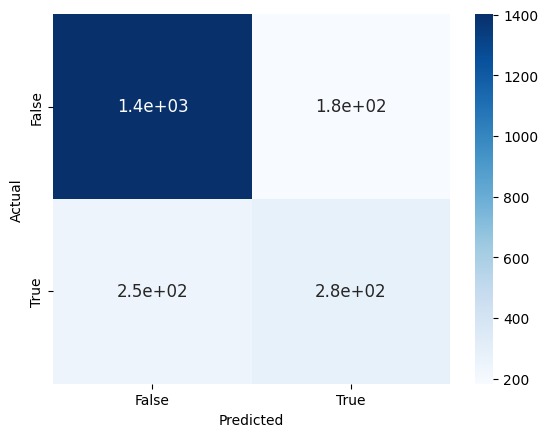

In [245]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = pd.DataFrame(confusion_matrix(y_validation, y_pred), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12});# font size

In [ ]:
# Create object that can calculate SHAP values of the GridSearchCV model
explainer = shap.KernelExplainer(model)

# Calculate SHAP values based on X_train data (SHAP values are in USD, the same units as the target variable)
shap_values = explainer.shap_values(X)

After reviewing our data, we can indicate the following:

The products that must be reviewed since they may have some quality and/or price problems are the Phone Service service and the Internet service with Fiber Optic. On the other hand, we can see that the Internet Service through Fiber Optic is directly associated with the Phone Service. What would be the reason for this? With this analysis, we cannot know, but we advise executives to observe these services since of the clients that have Churn, these two services are critical, which leads to problems with services derived from the Internet, which are Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movie since they depend directly on the Internet Service.

In addition to the observations we have on the characteristics of the products, we also have observations on the characteristics of the contracts and the form of payment.
These services caught our attention since within Churn a large percentage have a month-to-month contract and apparently have problems with the form of payment through Electronic Check.

In conclusion, we advise the executives of the company to observe and take action on these products, since in this way the Churn can be reduced and at the same time increase the income of the company and increase customer loyalty.

On the other hand, we can also observe that the probability that the clients have Churn with the critical services that were detected is 11.20%. At first glance, this probability seems low, but for the customers that are within the Churn with these characteristics, the company has lost a monthly income of €68,282, which is not a minor amount.

Bringing in a new customer is more expensive than retaining one.

These are the following recommendations that we can deliver to company executives in order to reduce Churn and increase revenue:

      1. Understand why your customers cancel.
    
      2. Identify the customers most likely to leave.
    
      3. Build a Customer Success team.
    
      4. Value the customer experience.

      5. Do not stop listening to who uses your service.

      6. Align expectations.

      7. Take action based on the suggestions received.

## Bibliography

Reference : 

- Stack Overflow [online] (May 10, 2021) Available at: https://stackoverflow.com/questions/67474348/how-do-i-create-a-bar-chart-with-percentage-values-in-python-plotly-express

- GeeksforGeeks [online] (16 Jul, 2020) Available at: https://www.geeksforgeeks.org/python-binomial-distribution/?ref=gcse

- Scribbr [online] Published on November 5, 2020 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/standard-normal-distribution/

- nbconvert documentation, Jupyter Development Team [online] Available at: https://nbconvert.readthedocs.io/en/latest/install.html

- Kaggle, Updated 5 Years Ago by Blastchar [online] Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- W3Schools, Copyright 1999-2023 by Refsnes Data [online] Available at: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php

- Copyright © the Python Graph Gallery 2018 [online] Available at: https://www.python-graph-gallery.com/barplot/

- Scribbr [online] Published on May 13, 2022 by Shaun Turney. Available at: https://www.scribbr.com/statistics/poisson-distribution/

- By Abhishek Wasnik / October 26, 2020. Available at: https://www.askpython.com/python/normal-distribution

- By GreekDataGuy / Jan 2, 2020. Available at: https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2

- GeeksforGeeks., 2021. Exploratory Data Analysis by KattamuriMeghna. Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

- Scribbr, Published on January 28, 2020 by Rebecca Bevans. Available at: https://www.scribbr.com/statistics/statistical-tests/

- Scribbr, Published on December 8, 2021 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/missing-data/

- W3schools, Pandas DataFrame astype() Method. Available at: https://www.w3schools.com/python/pandas/ref_df_astype.asp

- Microsoft, Normalize Data component. Article 11/04/2021. Available at: https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2

- Scikit-Learn, sklearn.preprocessing.StandardScaler, Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Analytics Vidhya by Aniruddha Bhandari — Published On April 3, 2020. Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

- GeeksforGeeks. ML | Principal Component Analysis(PCA), by aishwarya.27. Available at: https://www.geeksforgeeks.org/ml-principal-component-analysispca/

- Scikit-Learn, sklearn.decomposition.PCA. Available at:https://scikitlearn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- Medium Dec 25, 2019, by Aayush Bajaj. Available at: https://towardsdatascience.com/what-does-your-classification-metric-tell-about-your-data-4a8f35408a8b#:~:text=A%20low%20recall%20score%20